## **Importing important libraries**

In [ ]:
pip install --upgrade openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
from pandas import ExcelWriter
from pandas import ExcelFile
import statsmodels

In [ ]:
pd.__version__

'1.3.5'

## **Mounting** the google drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **Importing** the excel sheet from drive

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/MTech_Project/Data/New_JSW_Data.xlsx')

# **viewing** the Dataframe

In [ ]:
df

,Date,IBATime,SeqNO,HeatNO,SlabNo,SegmdataNo,cstLnS,CstLnE,STPLnS,STPLnE,...,CenterlineTopLc,CenterlineBotLc,MouldTopLc,MouldBotLc,ContinuousSlabLc,DiscontinuousSlabLc,Defect,Defect0_1,MCWInletTemp,DCCInletTemp
0,01.01.2020,01.01.2020 05:46:15,106775.0,20200004.0,2.020000e+09,1.0,7024.0,7027.0,0.0,78.0,...,0.149,0.0,0.000,0.000,0.0,0.005731,No,0,42.0,29.3
1,01.01.2020,01.01.2020 05:46:45,106775.0,20200004.0,2.020000e+09,2.0,7027.0,7030.0,78.0,156.0,...,0.000,0.0,0.000,0.000,0.0,0.000000,No,0,42.0,29.3
2,01.01.2020,01.01.2020 05:47:15,106775.0,20200004.0,2.020000e+09,3.0,7030.0,7033.0,156.0,234.0,...,0.035,0.0,0.348,0.000,0.0,0.001346,No,0,42.0,29.3
3,01.01.2020,01.01.2020 05:47:45,106775.0,20200004.0,2.020000e+09,4.0,7033.0,7036.0,234.0,312.0,...,0.000,0.0,0.000,0.072,0.0,0.000000,No,0,42.0,29.3
4,01.01.2020,01.01.2020 05:48:15,106775.0,20200004.0,2.020000e+09,5.0,7036.0,7039.0,312.0,390.0,...,0.081,0.0,0.086,0.000,0.0,0.003115,No,0,42.0,29.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128068,23.03.2020,24.03.2020 01:36:15,106871.0,20401352.0,2.040135e+09,8.0,6059.1,6062.1,672.0,768.0,...,0.000,0.0,0.000,0.000,0.0,0.000000,No,0,42.0,33.8
128069,23.03.2020,24.03.2020 01:36:45,106871.0,20401352.0,2.040135e+09,9.0,6062.1,6065.1,768.0,864.0,...,0.000,0.0,0.000,0.000,0.0,0.000000,No,0,42.0,33.8
128070,23.03.2020,24.03.2020 01:37:15,106871.0,20401352.0,2.040135e+09,10.0,6065.1,6068.1,864.0,960.0,...,0.000,0.0,0.000,0.000,0.0,0.000000,No,0,42.0,33.8
128071,23.03.2020,24.03.2020 01:37:45,106871.0,20401352.0,2.040135e+09,11.0,6068.1,6069.7,960.0,1056.0,...,0.000,0.0,0.000,0.000,0.0,0.000000,No,0,42.0,33.8


## **Making a copy of the dataframe to do further analysis**

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128073 entries, 0 to 128072
Columns: 125 entries, Date to DCCInletTemp
dtypes: float64(116), int64(1), object(8)
memory usage: 122.1+ MB


In [ ]:
df_copy.shape

(128073, 125)

128k data points, 125 columns

In [ ]:
null_per = df_copy.isnull().sum()/df.shape[0]*100
print(null_per)

Date                   0.000781
IBATime                0.000781
SeqNO                  0.000781
HeatNO                 0.000781
SlabNo                 0.000781
                         ...   
DiscontinuousSlabLc    0.000781
Defect                 0.000781
Defect0_1              0.000000
MCWInletTemp           0.000781
DCCInletTemp           0.000781
Length: 125, dtype: float64


In [ ]:
null_per.unique()

array([7.80804697e-04, 6.33232610e-01, 9.43992879e-01, 5.30166389e-01,
       8.83090113e-01, 8.12036885e-02, 6.87108134e-02, 0.00000000e+00])

In [ ]:
X = df_copy

In [ ]:
X

,Date,IBATime,SeqNO,HeatNO,SlabNo,SegmdataNo,cstLnS,CstLnE,STPLnS,STPLnE,...,CenterlineTopLc,CenterlineBotLc,MouldTopLc,MouldBotLc,ContinuousSlabLc,DiscontinuousSlabLc,Defect,Defect0_1,MCWInletTemp,DCCInletTemp
0,01.01.2020,01.01.2020 05:46:15,106775.0,20200004.0,2.020000e+09,1.0,7024.0,7027.0,0.0,78.0,...,0.149,0.0,0.000,0.000,0.0,0.005731,No,0,42.0,29.3
1,01.01.2020,01.01.2020 05:46:45,106775.0,20200004.0,2.020000e+09,2.0,7027.0,7030.0,78.0,156.0,...,0.000,0.0,0.000,0.000,0.0,0.000000,No,0,42.0,29.3
2,01.01.2020,01.01.2020 05:47:15,106775.0,20200004.0,2.020000e+09,3.0,7030.0,7033.0,156.0,234.0,...,0.035,0.0,0.348,0.000,0.0,0.001346,No,0,42.0,29.3
3,01.01.2020,01.01.2020 05:47:45,106775.0,20200004.0,2.020000e+09,4.0,7033.0,7036.0,234.0,312.0,...,0.000,0.0,0.000,0.072,0.0,0.000000,No,0,42.0,29.3
4,01.01.2020,01.01.2020 05:48:15,106775.0,20200004.0,2.020000e+09,5.0,7036.0,7039.0,312.0,390.0,...,0.081,0.0,0.086,0.000,0.0,0.003115,No,0,42.0,29.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128068,23.03.2020,24.03.2020 01:36:15,106871.0,20401352.0,2.040135e+09,8.0,6059.1,6062.1,672.0,768.0,...,0.000,0.0,0.000,0.000,0.0,0.000000,No,0,42.0,33.8
128069,23.03.2020,24.03.2020 01:36:45,106871.0,20401352.0,2.040135e+09,9.0,6062.1,6065.1,768.0,864.0,...,0.000,0.0,0.000,0.000,0.0,0.000000,No,0,42.0,33.8
128070,23.03.2020,24.03.2020 01:37:15,106871.0,20401352.0,2.040135e+09,10.0,6065.1,6068.1,864.0,960.0,...,0.000,0.0,0.000,0.000,0.0,0.000000,No,0,42.0,33.8
128071,23.03.2020,24.03.2020 01:37:45,106871.0,20401352.0,2.040135e+09,11.0,6068.1,6069.7,960.0,1056.0,...,0.000,0.0,0.000,0.000,0.0,0.000000,No,0,42.0,33.8


Filling all the NA values for composition

In [ ]:
col=["C",	"Si",	"S",	"P",	"Mn",	"Al",	"B",	"NLFOut",	"Ca",	"Ti", "Nb",	"Ni",	"Cr", "Cu",	"V", "MnbyS",	"BbyN", "AlxN",	"N2PickTund",	"TotN2" ]

for c in col: 
  X[c] = X[c].fillna(0)

X = X.dropna()
X = X.reset_index(drop = True)
X.shape

(127985, 125)

In [ ]:
#checking all the null values
X.isnull().sum()

Date                   0
IBATime                0
SeqNO                  0
HeatNO                 0
SlabNo                 0
                      ..
DiscontinuousSlabLc    0
Defect                 0
Defect0_1              0
MCWInletTemp           0
DCCInletTemp           0
Length: 125, dtype: int64

In [ ]:
#final dataframe
X

,Date,IBATime,SeqNO,HeatNO,SlabNo,SegmdataNo,cstLnS,CstLnE,STPLnS,STPLnE,...,CenterlineTopLc,CenterlineBotLc,MouldTopLc,MouldBotLc,ContinuousSlabLc,DiscontinuousSlabLc,Defect,Defect0_1,MCWInletTemp,DCCInletTemp
0,01.01.2020,01.01.2020 05:46:15,106775.0,20200004.0,2.020000e+09,1.0,7024.0,7027.0,0.0,78.0,...,0.149,0.0,0.000,0.000,0.0,0.005731,No,0,42.0,29.3
1,01.01.2020,01.01.2020 05:46:45,106775.0,20200004.0,2.020000e+09,2.0,7027.0,7030.0,78.0,156.0,...,0.000,0.0,0.000,0.000,0.0,0.000000,No,0,42.0,29.3
2,01.01.2020,01.01.2020 05:47:15,106775.0,20200004.0,2.020000e+09,3.0,7030.0,7033.0,156.0,234.0,...,0.035,0.0,0.348,0.000,0.0,0.001346,No,0,42.0,29.3
3,01.01.2020,01.01.2020 05:47:45,106775.0,20200004.0,2.020000e+09,4.0,7033.0,7036.0,234.0,312.0,...,0.000,0.0,0.000,0.072,0.0,0.000000,No,0,42.0,29.3
4,01.01.2020,01.01.2020 05:48:15,106775.0,20200004.0,2.020000e+09,5.0,7036.0,7039.0,312.0,390.0,...,0.081,0.0,0.086,0.000,0.0,0.003115,No,0,42.0,29.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127980,23.03.2020,24.03.2020 01:35:45,106871.0,20401352.0,2.040135e+09,7.0,6056.1,6059.1,576.0,672.0,...,0.000,0.0,0.000,0.000,0.0,0.000000,No,0,42.0,33.8
127981,23.03.2020,24.03.2020 01:36:15,106871.0,20401352.0,2.040135e+09,8.0,6059.1,6062.1,672.0,768.0,...,0.000,0.0,0.000,0.000,0.0,0.000000,No,0,42.0,33.8
127982,23.03.2020,24.03.2020 01:36:45,106871.0,20401352.0,2.040135e+09,9.0,6062.1,6065.1,768.0,864.0,...,0.000,0.0,0.000,0.000,0.0,0.000000,No,0,42.0,33.8
127983,23.03.2020,24.03.2020 01:37:15,106871.0,20401352.0,2.040135e+09,10.0,6065.1,6068.1,864.0,960.0,...,0.000,0.0,0.000,0.000,0.0,0.000000,No,0,42.0,33.8


Dropping all the irrelevant parameters

In [ ]:
X_final = X.drop([ "Date", "IBATime", "DiscontinuedLC",	"MouldLC",	"ContinuousLc", "CenterlineTopLc",	"CenterlineBotLc",	"MouldTopLc",	"MouldBotLc", "ContinuousSlabLc",	"DiscontinuousSlabLc", "Defect"], axis = 1)

In [ ]:
X_final

,SeqNO,HeatNO,SlabNo,SegmdataNo,cstLnS,CstLnE,STPLnS,STPLnE,MBotW,slbThik,...,ZonePres5,ZonePres6,ZonePres7,ZonePres8,EMBRcUR,SheearTemp,TotalLc,Defect0_1,MCWInletTemp,DCCInletTemp
0,106775.0,20200004.0,2.020000e+09,1.0,7024.0,7027.0,0.0,78.0,1277.062,65.0,...,10.89,12.00,10.83,1.59,-266.0,1008.0,0.149,0,42.0,29.3
1,106775.0,20200004.0,2.020000e+09,2.0,7027.0,7030.0,78.0,156.0,1277.062,65.0,...,10.96,12.00,10.89,1.59,-265.0,1008.0,0.000,0,42.0,29.3
2,106775.0,20200004.0,2.020000e+09,3.0,7030.0,7033.0,156.0,234.0,1277.062,65.0,...,10.86,12.00,10.81,1.56,-267.0,1008.0,0.383,0,42.0,29.3
3,106775.0,20200004.0,2.020000e+09,4.0,7033.0,7036.0,234.0,312.0,1277.062,65.0,...,10.87,12.00,10.79,1.58,-265.0,1008.0,0.072,0,42.0,29.3
4,106775.0,20200004.0,2.020000e+09,5.0,7036.0,7039.0,312.0,390.0,1277.062,65.0,...,10.89,12.00,10.79,1.59,-266.0,1008.0,0.167,0,42.0,29.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127980,106871.0,20401352.0,2.040135e+09,7.0,6056.1,6059.1,576.0,672.0,1181.434,65.0,...,12.00,11.14,12.00,2.07,212.0,1042.0,0.000,0,42.0,33.8
127981,106871.0,20401352.0,2.040135e+09,8.0,6059.1,6062.1,672.0,768.0,1181.434,65.0,...,12.00,11.23,12.00,2.08,212.0,1042.0,0.000,0,42.0,33.8
127982,106871.0,20401352.0,2.040135e+09,9.0,6062.1,6065.1,768.0,864.0,1181.434,65.0,...,12.00,11.24,12.00,2.09,212.0,1042.0,0.000,0,42.0,33.8
127983,106871.0,20401352.0,2.040135e+09,10.0,6065.1,6068.1,864.0,960.0,1181.434,65.0,...,12.00,11.23,12.00,2.08,212.0,1042.0,0.000,0,42.0,33.8


# **X_f2 is final dataset for regression**

In [ ]:
X_f2 = X_final.drop(["Defect0_1"], axis = 1)

In [ ]:
X_f2

,SeqNO,HeatNO,SlabNo,SegmdataNo,cstLnS,CstLnE,STPLnS,STPLnE,MBotW,slbThik,...,ZonePres4,ZonePres5,ZonePres6,ZonePres7,ZonePres8,EMBRcUR,SheearTemp,TotalLc,MCWInletTemp,DCCInletTemp
0,106775.0,20200004.0,2.020000e+09,1.0,7024.0,7027.0,0.0,78.0,1277.062,65.0,...,12.00,10.89,12.00,10.83,1.59,-266.0,1008.0,0.149,42.0,29.3
1,106775.0,20200004.0,2.020000e+09,2.0,7027.0,7030.0,78.0,156.0,1277.062,65.0,...,13.21,10.96,12.00,10.89,1.59,-265.0,1008.0,0.000,42.0,29.3
2,106775.0,20200004.0,2.020000e+09,3.0,7030.0,7033.0,156.0,234.0,1277.062,65.0,...,12.00,10.86,12.00,10.81,1.56,-267.0,1008.0,0.383,42.0,29.3
3,106775.0,20200004.0,2.020000e+09,4.0,7033.0,7036.0,234.0,312.0,1277.062,65.0,...,12.00,10.87,12.00,10.79,1.58,-265.0,1008.0,0.072,42.0,29.3
4,106775.0,20200004.0,2.020000e+09,5.0,7036.0,7039.0,312.0,390.0,1277.062,65.0,...,12.67,10.89,12.00,10.79,1.59,-266.0,1008.0,0.167,42.0,29.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127980,106871.0,20401352.0,2.040135e+09,7.0,6056.1,6059.1,576.0,672.0,1181.434,65.0,...,12.00,12.00,11.14,12.00,2.07,212.0,1042.0,0.000,42.0,33.8
127981,106871.0,20401352.0,2.040135e+09,8.0,6059.1,6062.1,672.0,768.0,1181.434,65.0,...,12.00,12.00,11.23,12.00,2.08,212.0,1042.0,0.000,42.0,33.8
127982,106871.0,20401352.0,2.040135e+09,9.0,6062.1,6065.1,768.0,864.0,1181.434,65.0,...,12.00,12.00,11.24,12.00,2.09,212.0,1042.0,0.000,42.0,33.8
127983,106871.0,20401352.0,2.040135e+09,10.0,6065.1,6068.1,864.0,960.0,1181.434,65.0,...,12.00,12.00,11.23,12.00,2.08,212.0,1042.0,0.000,42.0,33.8


## **ELIMINATING IRRELEVENT PARAMETERS AS OF NOW TO OBTAIN x1**

In [ ]:
X1 = X.drop([ "Date", "IBATime", "HeatNO", "slbThik", "LFProcTime", "TundWt", "LadleNo", "TundNo", "TundcarNo", "SEnPos", "SENSubm", "SENType", "ActTapEast", "ActTapWest", "MouldNo" , "FSCuPltThick" , "LSCuPltThik", "ESCuPltThik", "WSCuPltThik" , "CuPltLife", "DiscontinuedLC",	"MouldLC",	"ContinuousLc",	"CenterlineTopLc",	"CenterlineBotLc",	"MouldTopLc",	"MouldBotLc", "ContinuousSlabLc",	"DiscontinuousSlabLc", "Defect" ], axis = 1)

In [ ]:
X1

,SeqNO,SlabNo,SegmdataNo,cstLnS,CstLnE,STPLnS,STPLnE,MBotW,StpThik,CstSpeed,...,ZonePres5,ZonePres6,ZonePres7,ZonePres8,EMBRcUR,SheearTemp,TotalLc,Defect0_1,MCWInletTemp,DCCInletTemp
0,106775.0,2.020000e+09,1.0,7024.0,7027.0,0.0,78.0,1277.062,2.5,5.78,...,10.89,12.00,10.83,1.59,-266.0,1008.0,0.149,0,42.0,29.3
1,106775.0,2.020000e+09,2.0,7027.0,7030.0,78.0,156.0,1277.062,2.5,5.76,...,10.96,12.00,10.89,1.59,-265.0,1008.0,0.000,0,42.0,29.3
2,106775.0,2.020000e+09,3.0,7030.0,7033.0,156.0,234.0,1277.062,2.5,5.79,...,10.86,12.00,10.81,1.56,-267.0,1008.0,0.383,0,42.0,29.3
3,106775.0,2.020000e+09,4.0,7033.0,7036.0,234.0,312.0,1277.062,2.5,5.76,...,10.87,12.00,10.79,1.58,-265.0,1008.0,0.072,0,42.0,29.3
4,106775.0,2.020000e+09,5.0,7036.0,7039.0,312.0,390.0,1277.062,2.5,5.79,...,10.89,12.00,10.79,1.59,-266.0,1008.0,0.167,0,42.0,29.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127980,106871.0,2.040135e+09,7.0,6056.1,6059.1,576.0,672.0,1181.434,2.0,5.86,...,12.00,11.14,12.00,2.07,212.0,1042.0,0.000,0,42.0,33.8
127981,106871.0,2.040135e+09,8.0,6059.1,6062.1,672.0,768.0,1181.434,2.0,5.84,...,12.00,11.23,12.00,2.08,212.0,1042.0,0.000,0,42.0,33.8
127982,106871.0,2.040135e+09,9.0,6062.1,6065.1,768.0,864.0,1181.434,2.0,5.84,...,12.00,11.24,12.00,2.09,212.0,1042.0,0.000,0,42.0,33.8
127983,106871.0,2.040135e+09,10.0,6065.1,6068.1,864.0,960.0,1181.434,2.0,5.82,...,12.00,11.23,12.00,2.08,212.0,1042.0,0.000,0,42.0,33.8


## **OBTAINING X4 BY DROPPING THE GRADE COLUMN**

In [ ]:
X4 = X1.drop(['Grade'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
col=["C",	"Si",	"S",	"P",	"Mn",	"Al",	"B",	"NLFOut",	"Ca",	"Ti", "Nb",	"Ni",	"Cr", "Cu",	"V", "MnbyS",	"BbyN", "AlxN",	"N2PickTund",	"TotN2" ]

for c in col: 
  X4[c] = X4[c].fillna(0)

X4 = X4.dropna()
X4 = X4.reset_index(drop = True)
X4.shape

(127985, 94)

In [ ]:
X4.isnull().sum()

SeqNO           0
SlabNo          0
SegmdataNo      0
cstLnS          0
CstLnE          0
               ..
SheearTemp      0
TotalLc         0
Defect0_1       0
MCWInletTemp    0
DCCInletTemp    0
Length: 94, dtype: int64

In [ ]:
X4.to_csv('Trimmed_data_2.csv', index = False)

In [ ]:
null_per = X4["C"].isnull().sum()
print(null_per)

0


In [ ]:
col=["C",	"Si",	"S",	"P",	"Mn",	"Al",	"B",	"NLFOut",	"Ca",	"Ti", "Nb",	"Ni",	"Cr", "Cu",	"V", "MnbyS",	"BbyN", "AlxN",	"N2PickTund",	"TotN2" ]
for c in col: 
  X1[c] = X1[c].fillna(0)
X1 = X1.dropna()
X1 = X1.reset_index(drop = True)
X1.shape

(127985, 95)

In [ ]:
grade_wisedata = pd.crosstab(index=X1["Grade"], 
                           columns=X1["Defect0_1"])


#percentage1 = percentage defect contributed by a particular grade to the total no. of defects
grade_wisedata['percentage']=(grade_wisedata[1]/grade_wisedata[1].sum())*100

#percentage2 = (defective sheets/total sheets produced)% for a particular grade
grade_wisedata['percentage_2']=(grade_wisedata[1]/grade_wisedata[0])*100
grade_wisedata

Defect0_1,0,1,percentage,percentage_2
Grade,,,,
CG04AC,34129,67,28.632479,0.196314
CG04BC,49208,102,43.589744,0.207283
CP41AL,81,0,0.000000,0.000000
CP41AT,206,0,0.000000,0.000000
CR04AC,80,0,0.000000,0.000000
CR04SP,504,0,0.000000,0.000000
MC2052,250,0,0.000000,0.000000
MC26TP,62,0,0.000000,0.000000
PP46MS,501,0,0.000000,0.000000


In [ ]:
Grade_1 = X1.loc[X1['Grade']== 'CG04BC'] 
Grade_2 = X1.loc[X1['Grade']== 'CG04AC'] 
Grade_3 = X1.loc[X1['Grade']== 'ST52AL'] 
Grade_4 = X1.loc[X1['Grade']== 'SH41AK'] 

In [ ]:
Grade_1.to_csv('Grade_1.csv', index = False)
Grade_2.to_csv('Grade_2.csv', index = False)
Grade_3.to_csv('Grade_3.csv', index = False)
Grade_4.to_csv('Grade_4.csv', index = False)

Calculating gradewise analysis + clubbing 4 imp grades to make the final dataset

In [ ]:
X1

,SeqNO,SlabNo,SegmdataNo,cstLnS,CstLnE,STPLnS,STPLnE,MBotW,StpThik,CstSpeed,...,ZonePres5,ZonePres6,ZonePres7,ZonePres8,EMBRcUR,SheearTemp,TotalLc,Defect0_1,MCWInletTemp,DCCInletTemp
0,106775.0,2.020000e+09,1.0,7024.0,7027.0,0.0,78.0,1277.062,2.5,5.78,...,10.89,12.00,10.83,1.59,-266.0,1008.0,0.149,0,42.0,29.3
1,106775.0,2.020000e+09,2.0,7027.0,7030.0,78.0,156.0,1277.062,2.5,5.76,...,10.96,12.00,10.89,1.59,-265.0,1008.0,0.000,0,42.0,29.3
2,106775.0,2.020000e+09,3.0,7030.0,7033.0,156.0,234.0,1277.062,2.5,5.79,...,10.86,12.00,10.81,1.56,-267.0,1008.0,0.383,0,42.0,29.3
3,106775.0,2.020000e+09,4.0,7033.0,7036.0,234.0,312.0,1277.062,2.5,5.76,...,10.87,12.00,10.79,1.58,-265.0,1008.0,0.072,0,42.0,29.3
4,106775.0,2.020000e+09,5.0,7036.0,7039.0,312.0,390.0,1277.062,2.5,5.79,...,10.89,12.00,10.79,1.59,-266.0,1008.0,0.167,0,42.0,29.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127980,106871.0,2.040135e+09,7.0,6056.1,6059.1,576.0,672.0,1181.434,2.0,5.86,...,12.00,11.14,12.00,2.07,212.0,1042.0,0.000,0,42.0,33.8
127981,106871.0,2.040135e+09,8.0,6059.1,6062.1,672.0,768.0,1181.434,2.0,5.84,...,12.00,11.23,12.00,2.08,212.0,1042.0,0.000,0,42.0,33.8
127982,106871.0,2.040135e+09,9.0,6062.1,6065.1,768.0,864.0,1181.434,2.0,5.84,...,12.00,11.24,12.00,2.09,212.0,1042.0,0.000,0,42.0,33.8
127983,106871.0,2.040135e+09,10.0,6065.1,6068.1,864.0,960.0,1181.434,2.0,5.82,...,12.00,11.23,12.00,2.08,212.0,1042.0,0.000,0,42.0,33.8


# **Final dataset**


In [ ]:
Imp_grade = pd.concat([Grade_1, Grade_2, Grade_3, Grade_4]).reset_index()

In [ ]:
Imp_grade

,index,SeqNO,SlabNo,SegmdataNo,cstLnS,CstLnE,STPLnS,STPLnE,MBotW,StpThik,...,ZonePres5,ZonePres6,ZonePres7,ZonePres8,EMBRcUR,SheearTemp,TotalLc,Defect0_1,MCWInletTemp,DCCInletTemp
0,91,106775.0,2.010001e+09,1.0,7311.1,7314.1,0.0,78.0,1277.062,2.5,...,4.85,7.28,10.77,1.76,-197.0,987.0,0.206,0,43.0,29.3
1,92,106775.0,2.010001e+09,2.0,7314.1,7317.1,78.0,156.0,1277.062,2.5,...,4.91,7.38,10.85,1.93,-196.0,987.0,0.285,0,43.0,29.3
2,93,106775.0,2.010001e+09,3.0,7317.1,7320.1,156.0,234.0,1277.062,2.5,...,4.83,7.34,10.88,1.72,-196.0,987.0,0.096,0,43.0,29.3
3,94,106775.0,2.010001e+09,4.0,7320.1,7323.1,234.0,312.0,1277.062,2.5,...,4.79,7.29,10.85,1.72,-197.0,987.0,0.000,0,43.0,29.3
4,95,106775.0,2.010001e+09,5.0,7323.1,7326.1,312.0,390.0,1277.062,2.5,...,4.86,7.45,10.79,1.74,-197.0,987.0,0.111,0,43.0,29.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87154,108773,106856.0,2.030112e+09,10.0,2094.0,2097.0,459.0,510.0,1270.638,3.5,...,2.28,3.46,7.16,2.23,-189.0,967.0,0.000,0,41.0,31.1
87155,108774,106856.0,2.030112e+09,11.0,2097.0,2100.0,510.0,561.0,1270.638,3.5,...,2.26,3.46,7.17,2.23,-189.0,967.0,0.000,0,41.0,31.1
87156,108775,106856.0,2.030112e+09,12.0,2100.0,2103.0,561.0,612.0,1270.638,3.5,...,2.29,3.45,7.15,2.22,-189.0,967.0,0.000,0,41.0,31.1
87157,108776,106856.0,2.030112e+09,13.0,2103.0,2106.0,612.0,663.0,1270.638,3.5,...,2.29,3.52,7.33,2.22,-190.0,967.0,0.000,0,41.0,31.1


In [ ]:
Imp_grade.iloc[:int(87158*0.8),:]

,index,SeqNO,SlabNo,SegmdataNo,cstLnS,CstLnE,STPLnS,STPLnE,MBotW,StpThik,...,ZonePres5,ZonePres6,ZonePres7,ZonePres8,EMBRcUR,SheearTemp,TotalLc,Defect0_1,MCWInletTemp,DCCInletTemp
0,91,106775.0,2.010001e+09,1.0,7311.1,7314.1,0.0,78.0,1277.062,2.5,...,4.85,7.28,10.77,1.76,-197.0,987.0,0.206,0,43.0,29.3
1,92,106775.0,2.010001e+09,2.0,7314.1,7317.1,78.0,156.0,1277.062,2.5,...,4.91,7.38,10.85,1.93,-196.0,987.0,0.285,0,43.0,29.3
2,93,106775.0,2.010001e+09,3.0,7317.1,7320.1,156.0,234.0,1277.062,2.5,...,4.83,7.34,10.88,1.72,-196.0,987.0,0.096,0,43.0,29.3
3,94,106775.0,2.010001e+09,4.0,7320.1,7323.1,234.0,312.0,1277.062,2.5,...,4.79,7.29,10.85,1.72,-197.0,987.0,0.000,0,43.0,29.3
4,95,106775.0,2.010001e+09,5.0,7323.1,7326.1,312.0,390.0,1277.062,2.5,...,4.86,7.45,10.79,1.74,-197.0,987.0,0.111,0,43.0,29.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69721,73126,106831.0,2.020080e+09,9.0,5959.8,5962.8,720.0,810.0,1249.628,2.2,...,11.72,12.00,12.00,11.06,251.0,1083.0,0.205,0,42.0,32.5
69722,73127,106831.0,2.020080e+09,10.0,5962.8,5965.8,810.0,900.0,1249.628,2.2,...,11.70,12.00,12.00,11.08,251.0,1083.0,0.160,0,42.0,32.5
69723,73128,106831.0,2.020080e+09,11.0,5965.8,5968.8,900.0,990.0,1249.628,2.2,...,11.70,12.00,12.00,11.06,252.0,1083.0,1.452,0,42.0,32.5
69724,73129,106831.0,2.020080e+09,12.0,5968.8,5971.8,990.0,1080.0,1249.628,2.2,...,11.71,12.00,12.00,11.07,251.0,1083.0,0.180,0,42.0,32.5


In [ ]:
Imp_grade.to_csv('Imp_grade.csv', index = False)

In [ ]:
segData = Imp_grade[["SegmdataNo", "Defect0_1"]]

In [ ]:
segData

,SegmdataNo,Defect0_1
0,1.0,0
1,2.0,0
2,3.0,0
3,4.0,0
4,5.0,0
...,...,...
87154,10.0,0
87155,11.0,0
87156,12.0,0
87157,13.0,0


In [ ]:
segData = segData.groupby(['SegmdataNo']).sum()

In [ ]:
segData = segData.reset_index()

In [ ]:
x = segData.iloc[:,0]
y = segData.iloc[:,1]

In [ ]:
x 

0      1.0
1      2.0
2      3.0
3      4.0
4      5.0
5      6.0
6      7.0
7      8.0
8      9.0
9     10.0
10    11.0
11    12.0
12    13.0
13    14.0
Name: SegmdataNo, dtype: float64

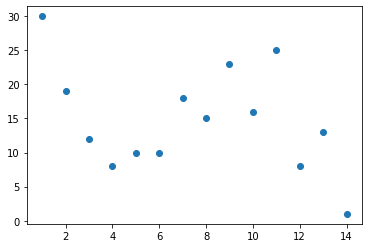

In [ ]:
plt.scatter(x,y)
plt.show()

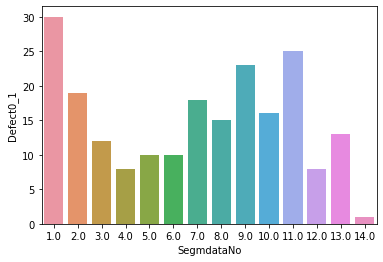

In [ ]:
sns.barplot(x = x, y = y)

In [ ]:
CstData = Imp_grade[["CastPwdr", "Defect0_1"]]

In [ ]:
CstData = CstData.groupby(['CastPwdr']).sum()

In [ ]:
CstData

,Defect0_1
CastPwdr,
221-VS,2
450 G,0
460 B2,18
460 B8,9
461 B,46
BJ-3,132
JD,1
L-09,0


In [ ]:
CstData.sum()

Defect0_1    208
dtype: int64

In [ ]:
CstData/CstData.sum()*100

,Defect0_1
CastPwdr,
221-VS,0.961538
450 G,0.000000
460 B2,8.653846
460 B8,4.326923
461 B,22.115385
BJ-3,63.461538
JD,0.480769
L-09,0.000000


In [ ]:
CstData.reset_index(inplace = True)

In [ ]:
CstData.drop("index", axis =1, inplace = True)

KeyError: ignored

In [ ]:
CstData

,CastPwdr,Defect0_1
0,221-VS,2
1,450 G,0
2,460 B2,18
3,460 B8,9
4,461 B,46
5,BJ-3,132
6,JD,1
7,L-09,0


In [ ]:
CstData = CstData.reset_index()

In [ ]:
x = CstData.iloc[:,0]
y = CstData.iloc[:,1]

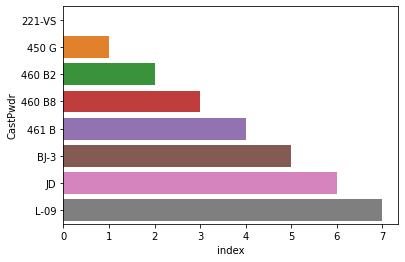

In [ ]:
sns.barplot(x = x, y = y)

#Below percentage gives us the percentage of Cast Powder used throughout the analysis.

In [ ]:
Imp_grade["CastPwdr"].value_counts()/Imp_grade["CastPwdr"].value_counts().sum()*100

BJ-3      75.504538
461 B     11.794536
460 B2     6.450281
460 B8     3.905506
221-VS     1.609702
JD         0.312073
L-09       0.220287
450 G      0.203077
Name: CastPwdr, dtype: float64

In [ ]:
cstdf = pd.DataFrame(Imp_grade["CastPwdr"].value_counts(), columns = ["CastPwdr","total_count"])

In [ ]:
cstdf

,CastPwdr,total_count
BJ-3,65809,NaN
461 B,10280,NaN
460 B2,5622,NaN
460 B8,3404,NaN
221-VS,1403,NaN
JD,272,NaN
L-09,192,NaN
450 G,177,NaN


In [ ]:
cstdf = cstdf.reset_index().drop("total_count", axis = 1)

In [ ]:
cstdf.columns = ["CastPwdr","total_count"]

In [ ]:
cstdf

,CastPwdr,total_count
0,BJ-3,65809
1,461 B,10280
2,460 B2,5622
3,460 B8,3404
4,221-VS,1403
5,JD,272
6,L-09,192
7,450 G,177


In [ ]:
cstdf.sort_values(by = ['CastPwdr'], inplace = True)

In [ ]:
A = np.array(CstData["Defect0_1"])
A

array([  2,   0,  18,   9,  46, 132,   1,   0])

In [ ]:
B = np.array(cstdf["total_count"])
B

array([ 1403,   177,  5622,  3404, 10280, 65809,   272,   192])

In [ ]:
C = A/B*100
C

array([0.14255167, 0.        , 0.32017076, 0.26439483, 0.44747082,
       0.20058047, 0.36764706, 0.        ])

In [ ]:
cstdf["per_defects"] = C

In [ ]:
cstdf = cstdf.drop("per_used", axis = 1)

KeyError: ignored

In [ ]:
cstdf

,CastPwdr,total_count,per_defects
4,221-VS,1403,0.142552
7,450 G,177,0.000000
2,460 B2,5622,0.320171
3,460 B8,3404,0.264395
1,461 B,10280,0.447471
0,BJ-3,65809,0.200580
5,JD,272,0.367647
6,L-09,192,0.000000


# **Group-By analysis begins**

In [ ]:
G1 = ['SeqNo', 'HeatNo', 'SlabNo', 'SegmdataNo', 'LadleNo', 'TundNo', 'TundCarNo']

In [ ]:
G1= X_final[['SeqNO', 'HeatNO', 'SlabNo', 'SegmdataNo', 'LadleNo', 'TundNo', 'TundcarNo']]
G1.corr()

,SeqNO,HeatNO,SlabNo,SegmdataNo,TundNo,TundcarNo
SeqNO,1.000000,0.016460,0.016460,0.001835,-0.022278,-0.028289
HeatNO,0.016460,1.000000,1.000000,-0.000411,0.072394,-0.062015
SlabNo,0.016460,1.000000,1.000000,-0.000411,0.072394,-0.062015
SegmdataNo,0.001835,-0.000411,-0.000411,1.000000,0.004715,0.009026
TundNo,-0.022278,0.072394,0.072394,0.004715,1.000000,-0.055009
TundcarNo,-0.028289,-0.062015,-0.062015,0.009026,-0.055009,1.000000


**Parameters: SeqNo, HeatNO will be taken into account, rest are either correlated or are categorical variables**

In [ ]:
G2 = ['cstLnS', 'CstLnE', 'STPLnS', 'STPLnE', 'MBotW', 'slbThik', 'StpThik', 'CstSpeed']

In [ ]:
G2= X_final[['cstLnS', 'CstLnE', 'STPLnS', 'STPLnE', 'MBotW', 'slbThik', 'StpThik', 'CstSpeed']]
G2.corr()

,cstLnS,CstLnE,STPLnS,STPLnE,MBotW,slbThik,StpThik,CstSpeed
cstLnS,1.000000,1.000000,0.045379,0.050196,-0.052158,-0.035340,-0.009735,0.117888
CstLnE,1.000000,1.000000,0.045298,0.050116,-0.052156,-0.035339,-0.009728,0.117883
STPLnS,0.045379,0.045298,1.000000,0.998315,-0.143760,0.036250,-0.309606,0.099052
STPLnE,0.050196,0.050116,0.998315,1.000000,-0.164371,0.040240,-0.353652,0.114971
MBotW,-0.052158,-0.052156,-0.143760,-0.164371,1.000000,-0.382925,0.349755,0.022621
slbThik,-0.035340,-0.035339,0.036250,0.040240,-0.382925,1.000000,0.053562,-0.289706
StpThik,-0.009735,-0.009728,-0.309606,-0.353652,0.349755,0.053562,1.000000,-0.263300
CstSpeed,0.117888,0.117883,0.099052,0.114971,0.022621,-0.289706,-0.263300,1.000000


**'cstLnS', 'STPLnE', 'MBotW' will be taken into account**

In [ ]:
G3 = ['LFProcTime',	'TundWt']

In [ ]:
G3= X_final[['LFProcTime',	'TundWt']]
G3.corr()

,LFProcTime,TundWt
LFProcTime,1.000000,-0.010211
TundWt,-0.010211,1.000000


Both 'LFProcTime',	'TundWt' will be taken into account 

In [ ]:
G4= X_final[['StlTmpTund', 'Liquidous', 'SupHeat']]
G4.corr()

,StlTmpTund,Liquidous,SupHeat
StlTmpTund,1.000000,0.014094,0.999616
Liquidous,0.014094,1.000000,-0.013628
SupHeat,0.999616,-0.013628,1.000000


Liquidous', 'SupHeat' will be taken into account

In [ ]:
G5= X_final[['StopperPos', 'SEnPos', 'SENSubm', 'SENType']]
G5.corr()

,StopperPos,SEnPos,SENSubm
StopperPos,1.000000,0.734671,-0.734983
SEnPos,0.734671,1.000000,-0.999961
SENSubm,-0.734983,-0.999961,1.000000


Only SEnPos will be taken

In [ ]:
G6= X_final[['HMOActStroke', 'HMOFreq', 'FrictStress', 'NegStripTime', 'NegStpRate']]
G6.corr()

,HMOActStroke,HMOFreq,FrictStress,NegStripTime,NegStpRate
HMOActStroke,1.000000,0.045621,0.152442,-0.181438,-0.099435
HMOFreq,0.045621,1.000000,-0.184619,-0.902135,-0.464588
FrictStress,0.152442,-0.184619,1.000000,0.243155,0.296454
NegStripTime,-0.181438,-0.902135,0.243155,1.000000,0.780003
NegStpRate,-0.099435,-0.464588,0.296454,0.780003,1.000000


**HMOActStroke, FrictStress, NegStpRate will taken into account**

In [ ]:
G7 = X_final[['EMBRcUR', 'SheearTemp']]
G7.corr()

,EMBRcUR,SheearTemp
EMBRcUR,1.000000,-0.018811
SheearTemp,-0.018811,1.000000


**Both EMBRcUR	SheearTemp will be taken**

In [ ]:
G10 =  X_final[['Zone1flow',	'Zone2flow',	'Zone3flow',	'Zone4Flow', 'Zone5Flow',	'Zone6Flow',	'Zone7Flow',	'Zone8Flow', 'ZonePres1', 'ZonePres2',	'ZonePres3',	'ZonePres4',	'ZonePres5', 'ZonePres6', 'ZonePres7',	'ZonePres8']]
G10.corr()

,Zone1flow,Zone2flow,Zone3flow,Zone4Flow,Zone5Flow,Zone6Flow,Zone7Flow,Zone8Flow,ZonePres1,ZonePres2,ZonePres3,ZonePres4,ZonePres5,ZonePres6,ZonePres7,ZonePres8
Zone1flow,1.000000,0.610983,0.694177,0.448756,0.471133,0.331295,0.032023,0.329809,0.224501,0.698019,0.699567,0.491908,0.413232,0.265575,0.210632,0.299324
Zone2flow,0.610983,1.000000,0.668385,0.552605,0.580391,0.461148,0.016531,0.029583,0.193829,0.792224,0.795039,0.672330,0.588910,0.532146,0.112767,0.055812
Zone3flow,0.694177,0.668385,1.000000,0.701222,0.656091,0.555461,0.093072,0.249534,0.274910,0.711459,0.785118,0.564013,0.538864,0.431111,0.308666,0.218920
Zone4Flow,0.448756,0.552605,0.701222,1.000000,0.524905,0.425617,0.151780,0.087855,0.322129,0.478107,0.479091,0.473031,0.363119,0.352859,0.164410,-0.049519
Zone5Flow,0.471133,0.580391,0.656091,0.524905,1.000000,0.733515,-0.014780,0.183098,0.144813,0.570386,0.664895,0.598716,0.910423,0.746571,0.176669,0.206782
Zone6Flow,0.331295,0.461148,0.555461,0.425617,0.733515,1.000000,0.255095,0.184381,0.095799,0.492088,0.539078,0.534933,0.618881,0.781811,0.339249,0.178950
Zone7Flow,0.032023,0.016531,0.093072,0.151780,-0.014780,0.255095,1.000000,0.137382,-0.084985,0.021119,0.030207,-0.122115,-0.151783,-0.001526,0.315969,-0.048070
Zone8Flow,0.329809,0.029583,0.249534,0.087855,0.183098,0.184381,0.137382,1.000000,-0.063918,0.125702,0.133082,0.008519,0.097026,0.099672,0.230024,0.914884
ZonePres1,0.224501,0.193829,0.274910,0.322129,0.144813,0.095799,-0.084985,-0.063918,1.000000,0.149044,0.090410,0.134283,0.182075,0.081386,0.046076,-0.071548
ZonePres2,0.698019,0.792224,0.711459,0.478107,0.570386,0.492088,0.021119,0.125702,0.149044,1.000000,0.840248,0.700941,0.556967,0.431988,0.195836,0.161813


Zone1flow, Zone7Flow, Zone8Flow , ZonePres1, ZonePres7, 	ZonePres8

In [ ]:
G12 = X_final[['BOPSFSR1TC3',	'BOPSFSR1TC4',	'BOPSFSR1TC5',	'BOPSFSR2TC3',	'BOPSFSR2TC4',	'BOPSFSR2TC5',	'BOPSFSR3TC3',	'BOPSFSR3TC4',	'BOPSFSR3TC5',	'BOPSLSR1TC1',	'BOPSLSR1TC4',	'BOPSLSR1TC5', 'BOPSLSR2TC3',	'BOPSLSR2TC4',	'BOPSLSR2TC5'	,'BOPSLSR3TC3',	'BOPSLSR3TC4'	,'BOPSLSR3TC5']]
G12.corr()

,BOPSFSR1TC3,BOPSFSR1TC4,BOPSFSR1TC5,BOPSFSR2TC3,BOPSFSR2TC4,BOPSFSR2TC5,BOPSFSR3TC3,BOPSFSR3TC4,BOPSFSR3TC5,BOPSLSR1TC1,BOPSLSR1TC4,BOPSLSR1TC5,BOPSLSR2TC3,BOPSLSR2TC4,BOPSLSR2TC5,BOPSLSR3TC3,BOPSLSR3TC4,BOPSLSR3TC5
BOPSFSR1TC3,1.000000,0.835806,0.885107,0.851805,0.781442,0.794085,0.867635,0.884322,0.862237,0.831202,0.091508,0.812008,0.841396,0.732764,0.723983,0.857388,0.263997,0.863195
BOPSFSR1TC4,0.835806,1.000000,0.836423,0.806276,0.804656,0.800667,0.837076,0.858766,0.847396,0.854311,0.127512,0.858214,0.837583,0.762336,0.806462,0.845901,0.265662,0.860595
BOPSFSR1TC5,0.885107,0.836423,1.000000,0.809605,0.735535,0.789954,0.850669,0.856497,0.835215,0.784279,0.083559,0.813875,0.811115,0.701897,0.680783,0.831300,0.324924,0.828530
BOPSFSR2TC3,0.851805,0.806276,0.809605,1.000000,0.842625,0.844426,0.901561,0.895416,0.878680,0.809273,0.139238,0.786379,0.912015,0.841724,0.817842,0.878773,0.189458,0.879330
BOPSFSR2TC4,0.781442,0.804656,0.735535,0.842625,1.000000,0.846612,0.807491,0.844906,0.834846,0.787909,0.130160,0.756076,0.829647,0.850309,0.821965,0.813553,0.201766,0.816546
BOPSFSR2TC5,0.794085,0.800667,0.789954,0.844426,0.846612,1.000000,0.830240,0.850768,0.856716,0.759213,0.126487,0.767887,0.835762,0.839955,0.832945,0.822759,0.221315,0.839247
BOPSFSR3TC3,0.867635,0.837076,0.850669,0.901561,0.807491,0.830240,1.000000,0.931794,0.912817,0.850526,0.114386,0.859685,0.897277,0.789587,0.794585,0.928932,0.273829,0.922634
BOPSFSR3TC4,0.884322,0.858766,0.856497,0.895416,0.844906,0.850768,0.931794,1.000000,0.939694,0.836632,0.108786,0.845550,0.896846,0.795653,0.814922,0.924182,0.231869,0.928221
BOPSFSR3TC5,0.862237,0.847396,0.835215,0.878680,0.834846,0.856716,0.912817,0.939694,1.000000,0.833120,0.079011,0.832666,0.882025,0.798616,0.827407,0.916207,0.242857,0.928158
BOPSLSR1TC1,0.831202,0.854311,0.784279,0.809273,0.787909,0.759213,0.850526,0.836632,0.833120,1.000000,0.200898,0.871126,0.846900,0.736303,0.736234,0.838666,0.323260,0.856653


BOPSFSR1TC3 ,BOPSLSR1TC4 are selected for further analysis

In [ ]:
G13 = X_final[['DCCInletTemp','MCWInletTemp', 'MCWFix', 'MCWLoose', 'MCWEast', 'MCWWest', 'MCWInletPres', 'MCWFlowFix', 'MCWFLOWLoose', 'MCWFloweast', 'MCWFlowWest']]
G13.corr()

,DCCInletTemp,MCWInletTemp,MCWFix,MCWLoose,MCWEast,MCWWest,MCWInletPres,MCWFlowFix,MCWFLOWLoose,MCWFloweast,MCWFlowWest
DCCInletTemp,1.000000,-0.011715,-0.068092,-0.065504,0.144650,0.138098,0.013623,0.181252,0.181391,0.006627,0.055432
MCWInletTemp,-0.011715,1.000000,0.673989,0.663837,0.469443,0.471017,0.050768,-0.036341,-0.036046,-0.076837,-0.032143
MCWFix,-0.068092,0.673989,1.000000,0.990946,0.375961,0.401325,0.205545,-0.308822,-0.308248,-0.131943,-0.155601
MCWLoose,-0.065504,0.663837,0.990946,1.000000,0.374971,0.396986,0.207188,-0.302538,-0.302099,-0.140969,-0.164042
MCWEast,0.144650,0.469443,0.375961,0.374971,1.000000,0.850433,-0.027437,0.096831,0.096985,-0.274485,0.020616
MCWWest,0.138098,0.471017,0.401325,0.396986,0.850433,1.000000,-0.024545,0.079966,0.080224,-0.185959,-0.089726
MCWInletPres,0.013623,0.050768,0.205545,0.207188,-0.027437,-0.024545,1.000000,-0.411919,-0.412307,0.151655,0.078282
MCWFlowFix,0.181252,-0.036341,-0.308822,-0.302538,0.096831,0.079966,-0.411919,1.000000,0.998257,-0.205804,-0.123903
MCWFLOWLoose,0.181391,-0.036046,-0.308248,-0.302099,0.096985,0.080224,-0.412307,0.998257,1.000000,-0.205788,-0.124245
MCWFloweast,0.006627,-0.076837,-0.131943,-0.140969,-0.274485,-0.185959,0.151655,-0.205804,-0.205788,1.000000,0.430517


As expected DCCInletTemp is not related to anyone. Thus DCCInletTemp, 
MCWFix, MCWFLOWLoose,	MCWFloweast is taken into account

In [ ]:
G14= X_final[['Grade', 'CastPwdr']]
G14.corr()

""


In [ ]:
G15= X_final[['FSCuPltThick', 'LSCuPltThik', 'ESCuPltThik', 'WSCuPltThik', 'CuPltLife']]
G15.corr()

,FSCuPltThick,LSCuPltThik,ESCuPltThik,WSCuPltThik,CuPltLife
FSCuPltThick,1.000000,0.996594,0.392245,0.392245,-0.195964
LSCuPltThik,0.996594,1.000000,0.412631,0.412631,-0.180248
ESCuPltThik,0.392245,0.412631,1.000000,1.000000,-0.177650
WSCuPltThik,0.392245,0.412631,1.000000,1.000000,-0.177650
CuPltLife,-0.195964,-0.180248,-0.177650,-0.177650,1.000000


**From G15, we can take FSCuPltThick,CuPltLife**

In [ ]:
G16= X_final[['AbsHFFix', 'AbsHfLoose', 'AbsHFEast', 'AbsHFWest']]
G16.corr()

,AbsHFFix,AbsHfLoose,AbsHFEast,AbsHFWest
AbsHFFix,1.000000,0.915310,0.225923,0.229787
AbsHfLoose,0.915310,1.000000,0.199591,0.197053
AbsHFEast,0.225923,0.199591,1.000000,0.805592
AbsHFWest,0.229787,0.197053,0.805592,1.000000


**From G16, we can take AbsHFFix **

In [ ]:
G17= X_final[['MldLevelAct', 'ActTapEast', 'ActTapWest', 'MouldNo']]
G17.corr()

,MldLevelAct,ActTapEast,ActTapWest
MldLevelAct,1.000000,-0.068269,-0.014874
ActTapEast,-0.068269,1.000000,0.808213
ActTapWest,-0.014874,0.808213,1.000000


**From G-17, we can take MldLevelAct (Mould Level Actual) and Actual Taper West (ActTapWest)**

***Final Parameters chosen after feature engineering***:








G17: ActTapWest, MldLevelAct


## **Making Final dataset**

In [ ]:
X_final.drop(["LadleNo","MouldNo"], axis = 1, inplace = True)

In [ ]:
X_final

,SeqNO,HeatNO,SlabNo,SegmdataNo,cstLnS,CstLnE,STPLnS,STPLnE,MBotW,slbThik,...,ZonePres5,ZonePres6,ZonePres7,ZonePres8,EMBRcUR,SheearTemp,TotalLc,Defect0_1,MCWInletTemp,DCCInletTemp
0,106775.0,20200004.0,2.020000e+09,1.0,7024.0,7027.0,0.0,78.0,1277.062,65.0,...,10.89,12.00,10.83,1.59,-266.0,1008.0,0.149,0,42.0,29.3
1,106775.0,20200004.0,2.020000e+09,2.0,7027.0,7030.0,78.0,156.0,1277.062,65.0,...,10.96,12.00,10.89,1.59,-265.0,1008.0,0.000,0,42.0,29.3
2,106775.0,20200004.0,2.020000e+09,3.0,7030.0,7033.0,156.0,234.0,1277.062,65.0,...,10.86,12.00,10.81,1.56,-267.0,1008.0,0.383,0,42.0,29.3
3,106775.0,20200004.0,2.020000e+09,4.0,7033.0,7036.0,234.0,312.0,1277.062,65.0,...,10.87,12.00,10.79,1.58,-265.0,1008.0,0.072,0,42.0,29.3
4,106775.0,20200004.0,2.020000e+09,5.0,7036.0,7039.0,312.0,390.0,1277.062,65.0,...,10.89,12.00,10.79,1.59,-266.0,1008.0,0.167,0,42.0,29.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127980,106871.0,20401352.0,2.040135e+09,7.0,6056.1,6059.1,576.0,672.0,1181.434,65.0,...,12.00,11.14,12.00,2.07,212.0,1042.0,0.000,0,42.0,33.8
127981,106871.0,20401352.0,2.040135e+09,8.0,6059.1,6062.1,672.0,768.0,1181.434,65.0,...,12.00,11.23,12.00,2.08,212.0,1042.0,0.000,0,42.0,33.8
127982,106871.0,20401352.0,2.040135e+09,9.0,6062.1,6065.1,768.0,864.0,1181.434,65.0,...,12.00,11.24,12.00,2.09,212.0,1042.0,0.000,0,42.0,33.8
127983,106871.0,20401352.0,2.040135e+09,10.0,6065.1,6068.1,864.0,960.0,1181.434,65.0,...,12.00,11.23,12.00,2.08,212.0,1042.0,0.000,0,42.0,33.8


In [ ]:
Xg1_final = X_final[["Grade", "CastPwdr", "SegmdataNo", "STPLnE", "Liquidous", "SupHeat", "EMBRcUR", "SheearTemp", "BOPSFSR1TC3", "BOPSLSR1TC4", "FrictStress","SEnPos", "DCCInletTemp", "MCWFix", "MCWFLOWLoose", "MCWFloweast", "FSCuPltThick", "AbsHFFix", "ActTapWest", "MldLevelAct", "Zone1flow", "Zone7Flow", "Zone8Flow", "ZonePres1", "ZonePres7", "ZonePres8", "TotalLc", "Defect0_1" ]]

In [ ]:
Xg1_final = Xg1_final.loc[(Xg1_final['Grade'] == 'SH41AK') | (Xg1_final['Grade'] == 'ST52AL') | (Xg1_final['Grade'] == 'CG04AC') | (Xg1_final['Grade'] == 'CG04BC')]

In [ ]:
Xg1_final

,Grade,CastPwdr,SegmdataNo,STPLnE,Liquidous,SupHeat,EMBRcUR,SheearTemp,BOPSFSR1TC3,BOPSLSR1TC4,...,ActTapWest,MldLevelAct,Zone1flow,Zone7Flow,Zone8Flow,ZonePres1,ZonePres7,ZonePres8,TotalLc,Defect0_1
0,CG04AC,BJ-3,1.0,78.0,1532.0,15.0,-266.0,1008.0,201.9,185.6,...,3.5,82.67,377.0,457.0,448.0,7.26,10.83,1.59,0.149,0
1,CG04AC,BJ-3,2.0,156.0,1532.0,15.0,-265.0,1008.0,201.3,182.8,...,3.5,83.15,375.0,458.0,449.0,7.30,10.89,1.59,0.000,0
2,CG04AC,BJ-3,3.0,234.0,1532.0,16.0,-267.0,1008.0,200.1,183.2,...,3.5,83.04,373.0,458.0,443.0,7.28,10.81,1.56,0.383,0
3,CG04AC,BJ-3,4.0,312.0,1532.0,16.0,-265.0,1008.0,196.2,183.9,...,3.5,82.85,375.0,458.0,447.0,7.32,10.79,1.58,0.072,0
4,CG04AC,BJ-3,5.0,390.0,1532.0,16.0,-266.0,1008.0,197.4,183.9,...,3.5,82.96,376.0,454.0,449.0,7.41,10.79,1.59,0.167,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127427,CG04BC,BJ-3,8.0,384.0,1532.0,16.0,208.0,1024.0,190.7,186.6,...,2.1,78.90,366.0,387.0,375.0,2.90,12.00,2.08,0.728,0
127428,CG04BC,BJ-3,9.0,432.0,1532.0,17.0,207.0,1024.0,190.9,187.4,...,2.1,80.06,365.0,388.0,375.0,2.90,12.00,2.07,0.000,0
127429,CG04BC,BJ-3,10.0,480.0,1532.0,17.0,207.0,1024.0,189.7,188.1,...,2.1,79.56,366.0,387.0,374.0,2.90,12.00,2.06,0.986,0
127430,CG04BC,BJ-3,11.0,528.0,1532.0,18.0,208.0,1024.0,191.0,187.3,...,2.1,79.62,365.0,387.0,374.0,2.89,12.00,2.06,0.034,0


In [ ]:
Xg1_final.to_csv('finaldata.csv', index = False)

In [ ]:
Xg22 = pd.get_dummies(Xg1_final,drop_first=True)

In [ ]:
Xg22["EMBRcUR"] = abs(Xg22["EMBRcUR"])

In [ ]:
Xg22

,SegmdataNo,STPLnE,Liquidous,SupHeat,EMBRcUR,SheearTemp,BOPSFSR1TC3,BOPSLSR1TC4,FrictStress,SEnPos,...,Grade_CG04BC,Grade_SH41AK,Grade_ST52AL,CastPwdr_450 G,CastPwdr_460 B2,CastPwdr_460 B8,CastPwdr_461 B,CastPwdr_BJ-3,CastPwdr_JD,CastPwdr_L-09
0,1.0,78.0,1532.0,15.0,266.0,1008.0,201.9,185.6,15.568,12.0,...,0,0,0,0,0,0,0,1,0,0
1,2.0,156.0,1532.0,15.0,265.0,1008.0,201.3,182.8,15.888,12.0,...,0,0,0,0,0,0,0,1,0,0
2,3.0,234.0,1532.0,16.0,267.0,1008.0,200.1,183.2,14.608,12.0,...,0,0,0,0,0,0,0,1,0,0
3,4.0,312.0,1532.0,16.0,265.0,1008.0,196.2,183.9,14.288,12.0,...,0,0,0,0,0,0,0,1,0,0
4,5.0,390.0,1532.0,16.0,266.0,1008.0,197.4,183.9,14.992,12.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127427,8.0,384.0,1532.0,16.0,208.0,1024.0,190.7,186.6,19.616,58.0,...,1,0,0,0,0,0,0,1,0,0
127428,9.0,432.0,1532.0,17.0,207.0,1024.0,190.9,187.4,20.189,58.0,...,1,0,0,0,0,0,0,1,0,0
127429,10.0,480.0,1532.0,17.0,207.0,1024.0,189.7,188.1,19.616,58.0,...,1,0,0,0,0,0,0,1,0,0
127430,11.0,528.0,1532.0,18.0,208.0,1024.0,191.0,187.3,19.906,58.0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
Xg22 = Xg22[Xg22["TotalLc"] != 0.000]

In [ ]:
Xg22 = Xg22.reset_index(drop = True)

In [ ]:
Xg22

,SegmdataNo,STPLnE,Liquidous,SupHeat,EMBRcUR,SheearTemp,BOPSFSR1TC3,BOPSLSR1TC4,FrictStress,SEnPos,...,Grade_CG04BC,Grade_SH41AK,Grade_ST52AL,CastPwdr_450 G,CastPwdr_460 B2,CastPwdr_460 B8,CastPwdr_461 B,CastPwdr_BJ-3,CastPwdr_JD,CastPwdr_L-09
0,1.0,78.0,1532.0,15.0,266.0,1008.0,201.9,185.6,15.568,12.0,...,0,0,0,0,0,0,0,1,0,0
1,3.0,234.0,1532.0,16.0,267.0,1008.0,200.1,183.2,14.608,12.0,...,0,0,0,0,0,0,0,1,0,0
2,4.0,312.0,1532.0,16.0,265.0,1008.0,196.2,183.9,14.288,12.0,...,0,0,0,0,0,0,0,1,0,0
3,5.0,390.0,1532.0,16.0,266.0,1008.0,197.4,183.9,14.992,12.0,...,0,0,0,0,0,0,0,1,0,0
4,6.0,468.0,1532.0,17.0,266.0,1008.0,196.2,182.3,14.736,12.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41523,4.0,192.0,1532.0,15.0,207.0,1024.0,193.3,189.0,20.128,58.0,...,1,0,0,0,0,0,0,1,0,0
41524,7.0,336.0,1532.0,16.0,207.0,1024.0,190.4,187.4,20.058,58.0,...,1,0,0,0,0,0,0,1,0,0
41525,8.0,384.0,1532.0,16.0,208.0,1024.0,190.7,186.6,19.616,58.0,...,1,0,0,0,0,0,0,1,0,0
41526,10.0,480.0,1532.0,17.0,207.0,1024.0,189.7,188.1,19.616,58.0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
y_22 = Xg22["TotalLc"]

In [ ]:
X_22 = Xg22.drop(["TotalLc","Defect0_1", "SegmdataNo"], axis =1)

In [ ]:
X_22

,STPLnE,Liquidous,SupHeat,EMBRcUR,SheearTemp,BOPSFSR1TC3,BOPSLSR1TC4,FrictStress,SEnPos,DCCInletTemp,...,Grade_CG04BC,Grade_SH41AK,Grade_ST52AL,CastPwdr_450 G,CastPwdr_460 B2,CastPwdr_460 B8,CastPwdr_461 B,CastPwdr_BJ-3,CastPwdr_JD,CastPwdr_L-09
0,78.0,1532.0,15.0,266.0,1008.0,201.9,185.6,15.568,12.0,29.3,...,0,0,0,0,0,0,0,1,0,0
1,234.0,1532.0,16.0,267.0,1008.0,200.1,183.2,14.608,12.0,29.3,...,0,0,0,0,0,0,0,1,0,0
2,312.0,1532.0,16.0,265.0,1008.0,196.2,183.9,14.288,12.0,29.3,...,0,0,0,0,0,0,0,1,0,0
3,390.0,1532.0,16.0,266.0,1008.0,197.4,183.9,14.992,12.0,29.3,...,0,0,0,0,0,0,0,1,0,0
4,468.0,1532.0,17.0,266.0,1008.0,196.2,182.3,14.736,12.0,29.3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41523,192.0,1532.0,15.0,207.0,1024.0,193.3,189.0,20.128,58.0,33.1,...,1,0,0,0,0,0,0,1,0,0
41524,336.0,1532.0,16.0,207.0,1024.0,190.4,187.4,20.058,58.0,33.1,...,1,0,0,0,0,0,0,1,0,0
41525,384.0,1532.0,16.0,208.0,1024.0,190.7,186.6,19.616,58.0,33.1,...,1,0,0,0,0,0,0,1,0,0
41526,480.0,1532.0,17.0,207.0,1024.0,189.7,188.1,19.616,58.0,33.1,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
y_22

0        0.149
1        0.383
2        0.072
3        0.167
4        0.106
         ...  
41523    0.096
41524    0.066
41525    0.728
41526    0.986
41527    0.034
Name: TotalLc, Length: 41528, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

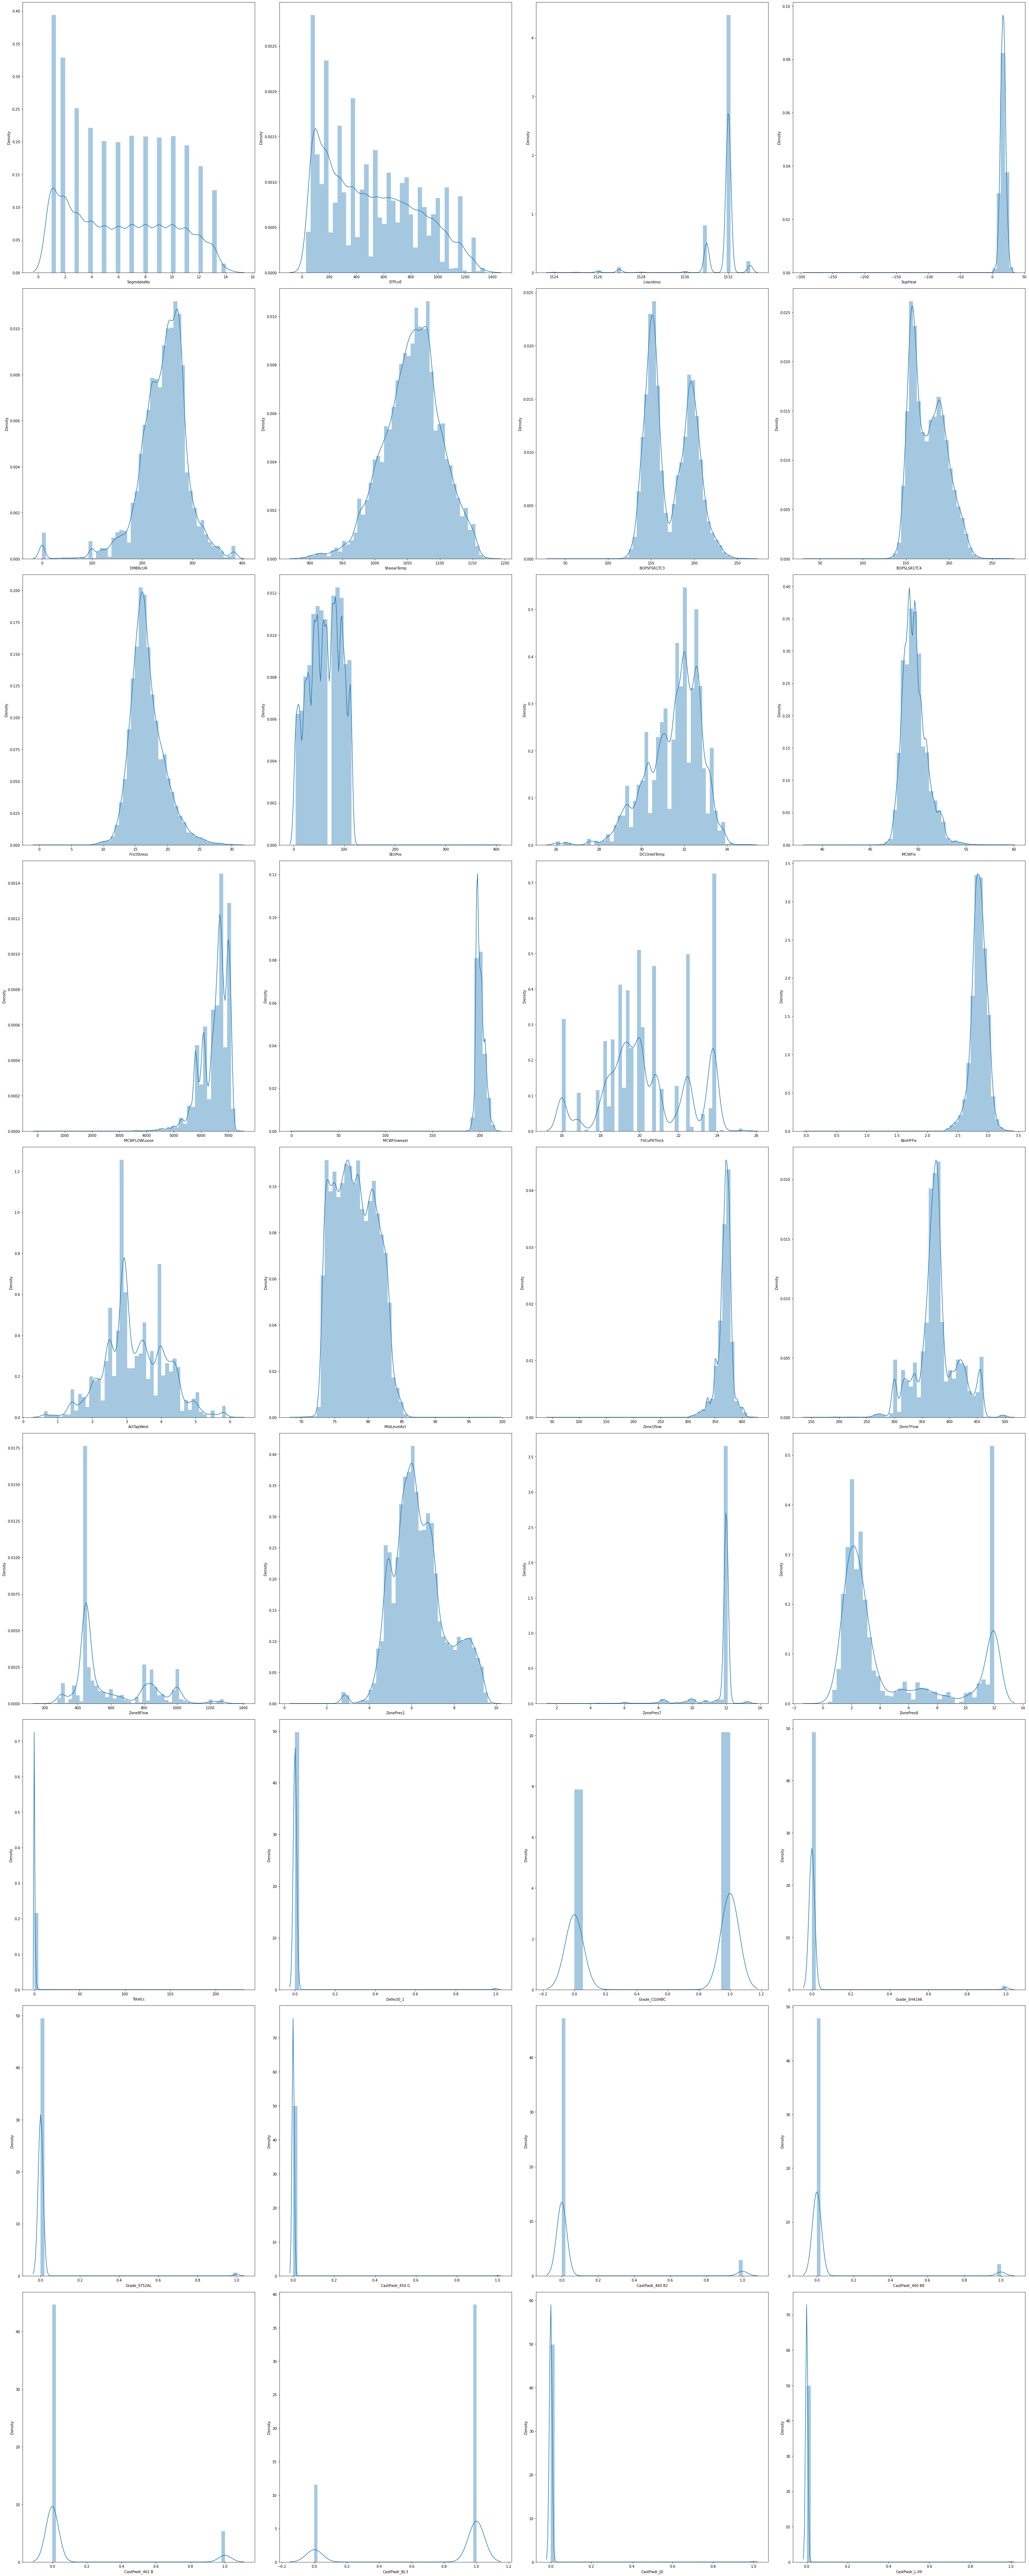

In [ ]:
fig,axes=plt.subplots(ncols=4,nrows=9,figsize=(40,100))
index=0
axes=axes.flatten()
for col,value in Xg22.items():
    sns.distplot(value,ax=axes[index])
    index+=1
plt.tight_layout()

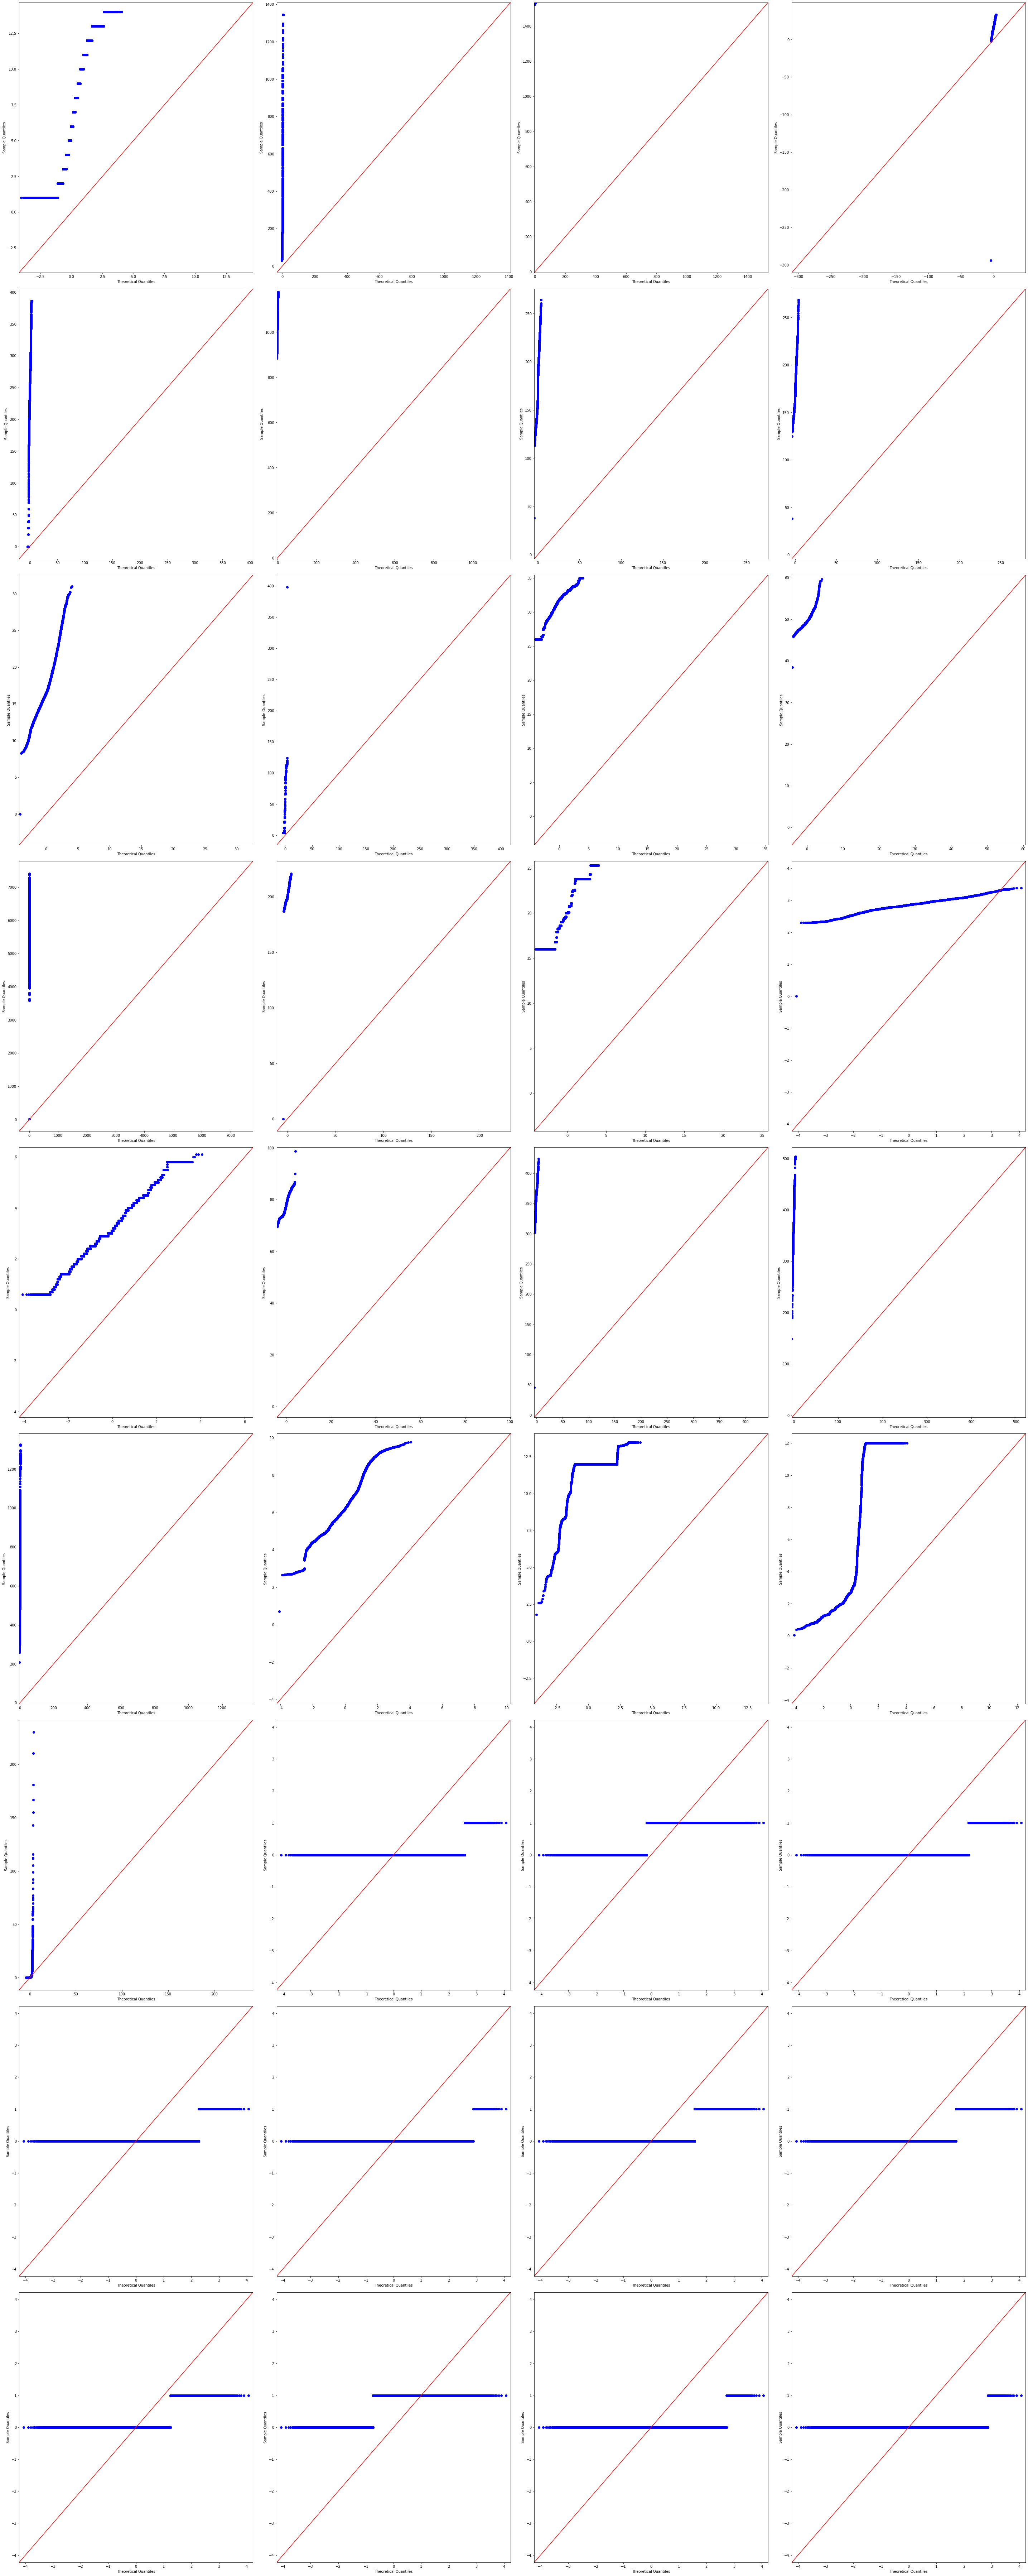

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig,axes=plt.subplots(ncols=4,nrows=9,figsize=(40,100))
index=0
axes=axes.flatten()
for col,value in Xg22.items():
    sm.qqplot(value, ax=axes[index], line = '45')
    index+=1
plt.tight_layout()

In [ ]:
import pandas as pd
from sklearn import preprocessing
 #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_221 = min_max_scaler.fit_transform(X_22)
#x_test_scaled_22 = min_max_scaler.transform(x_test_22)
dfx_22 = pd.DataFrame(X_22)

In [ ]:
x_train_22 = X_22.iloc[0:int(len(X_22)*0.75),:]
x_test_22 = X_22.iloc[31146:,:]

In [ ]:
y_train_22 = y_22[0:int(len(Xg22)*0.75)]
y_test_22 = y_22[31146:]

In [ ]:
x_train_22

,STPLnE,Liquidous,SupHeat,EMBRcUR,SheearTemp,BOPSFSR1TC3,BOPSLSR1TC4,FrictStress,SEnPos,DCCInletTemp,...,Grade_CG04BC,Grade_SH41AK,Grade_ST52AL,CastPwdr_450 G,CastPwdr_460 B2,CastPwdr_460 B8,CastPwdr_461 B,CastPwdr_BJ-3,CastPwdr_JD,CastPwdr_L-09
0,78.0,1532.0,15.0,266.0,1008.0,201.9,185.6,15.568,12.0,29.3,...,0,0,0,0,0,0,0,1,0,0
1,234.0,1532.0,16.0,267.0,1008.0,200.1,183.2,14.608,12.0,29.3,...,0,0,0,0,0,0,0,1,0,0
2,312.0,1532.0,16.0,265.0,1008.0,196.2,183.9,14.288,12.0,29.3,...,0,0,0,0,0,0,0,1,0,0
3,390.0,1532.0,16.0,266.0,1008.0,197.4,183.9,14.992,12.0,29.3,...,0,0,0,0,0,0,0,1,0,0
4,468.0,1532.0,17.0,266.0,1008.0,196.2,182.3,14.736,12.0,29.3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31141,450.0,1532.0,16.0,324.0,1080.0,200.6,214.7,13.200,66.0,32.5,...,0,0,0,0,0,0,0,1,0,0
31142,495.0,1532.0,16.0,325.0,1080.0,204.1,212.7,12.816,66.0,32.5,...,0,0,0,0,0,0,0,1,0,0
31143,540.0,1532.0,16.0,325.0,1080.0,203.8,212.5,13.200,66.0,32.5,...,0,0,0,0,0,0,0,1,0,0
31144,60.0,1532.0,15.0,325.0,1079.0,203.3,211.3,13.264,66.0,32.6,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
x_test_22.shape

(10382, 33)

In [ ]:
import pandas as pd
from sklearn import preprocessing
 #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_train_scaled_22 = min_max_scaler.fit_transform(x_train_22)
x_test_scaled_22 = min_max_scaler.transform(x_test_22)
df_22 = pd.DataFrame(x_train_scaled_22)

In [ ]:
import pandas as pd
from sklearn import preprocessing
 #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_train_scaled_22 = min_max_scaler.fit_transform(x_train_22)
x_test_scaled_22 = min_max_scaler.transform(x_test_22)
df_22 = pd.DataFrame(x_train_scaled_22)

In [ ]:
df_test_22 = pd.DataFrame(x_test_scaled_22)

In [ ]:
from sklearn import datasets, linear_model, metrics

In [ ]:
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(dfx_22, y_22)

LinearRegression()

In [ ]:
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(df_22, y_train_22)

LinearRegression()

In [ ]:
y = reg.predict(dfx_22)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_22,y)

0.013471122203242536

In [ ]:
1 - (1-reg.score(dfx_22, y_22))*(len(y_22)-1)/(len(y_22)-dfx_22.shape[1]-1)

0.01268654002347458

In [ ]:
1 - (1-reg.score(df_22, y_train_22))*(len(y_train_22)-1)/(len(y_train_22)-df_22.shape[1]-1)

0.015972638142785045

# **adj R2**

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
model = sm.OLS(y_train_22, df_22).fit()

#display adjusted R-squared
print(model.rsquared_adj)

0.061361180591664066


In [ ]:
print(model.rsquared)

0.06232555618471192


## **Xgboost22**

In [ ]:
xgb = XGBRegressor(n_estimators=200)
xgb.fit(df_22, y_train_22)

NameError: ignored

In [ ]:
xgb = XGBRegressor(n_estimators=200)
xgb.fit(dfx_22, y_22)

[10:12:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=200)

In [ ]:
y = xgb.predict(dfx_22)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_22,y)

0.42350520437166284

In [ ]:
1 - (1-xgb.score(dfx_22, y_22))*(len(y_22)-1)/(len(y_22)-dfx_22.shape[1]-1)

0.4230467205365124

In [ ]:
xgb.feature_importances_

array([0.02717381, 0.03346379, 0.0205633 , 0.04662705, 0.0874949 ,
       0.03842604, 0.04669305, 0.08768006, 0.0233944 , 0.01830078,
       0.01130851, 0.059626  , 0.03019915, 0.01695873, 0.04358617,
       0.01232217, 0.04805856, 0.0206019 , 0.15114328, 0.02521927,
       0.03220634, 0.00908355, 0.02304885, 0.00217309, 0.00216404,
       0.0251236 , 0.        , 0.01698031, 0.04037933, 0.        ,
       0.        , 0.        , 0.        ], dtype=float32)

In [ ]:
xgb.feature_importances_.shape

(33,)

In [ ]:
perm_importance = permutation_importance(xgb, dfx_22, y_22)

In [ ]:
col_names = list(X_22.columns)
col_names

['STPLnE',
 'Liquidous',
 'SupHeat',
 'EMBRcUR',
 'SheearTemp',
 'BOPSFSR1TC3',
 'BOPSLSR1TC4',
 'FrictStress',
 'SEnPos',
 'DCCInletTemp',
 'MCWFix',
 'MCWFLOWLoose',
 'MCWFloweast',
 'FSCuPltThick',
 'AbsHFFix',
 'ActTapWest',
 'MldLevelAct',
 'Zone1flow',
 'Zone7Flow',
 'Zone8Flow',
 'ZonePres1',
 'ZonePres7',
 'ZonePres8',
 'Grade_CG04BC',
 'Grade_SH41AK',
 'Grade_ST52AL',
 'CastPwdr_450 G',
 'CastPwdr_460 B2',
 'CastPwdr_460 B8',
 'CastPwdr_461 B',
 'CastPwdr_BJ-3',
 'CastPwdr_JD',
 'CastPwdr_L-09']

<BarContainer object of 33 artists>

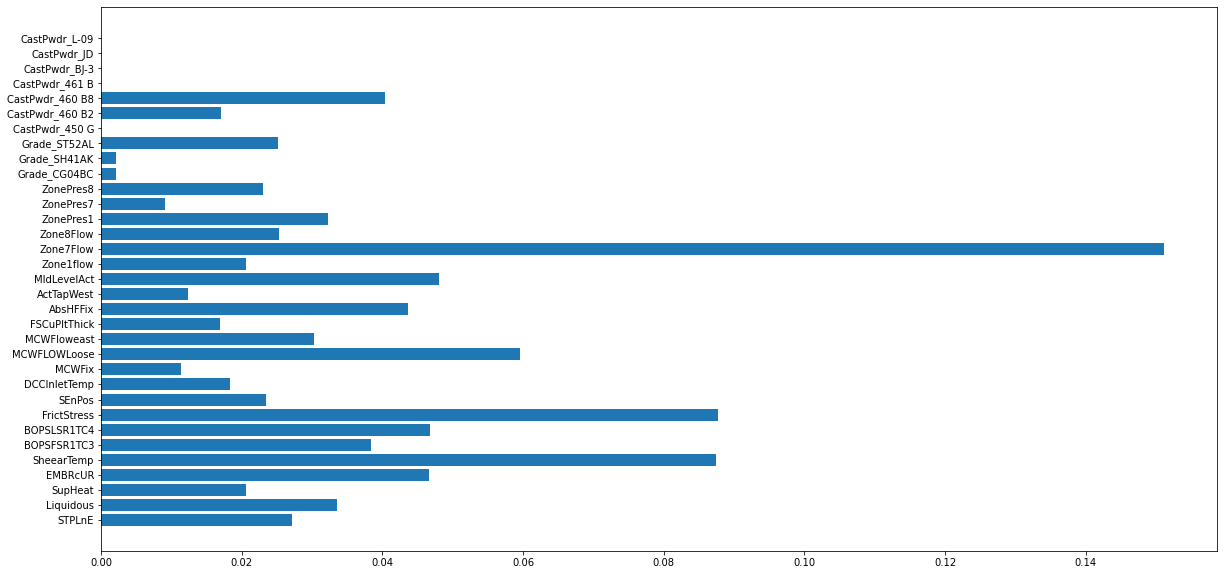

In [ ]:
plt1 = plt.figure(figsize= (20,10))
plt.barh(col_names, xgb.feature_importances_)
# plt.barh(col_names, xgb.feature_importances_)


In [ ]:
r2_score(y_train_22,y)

0.4527868434865958

In [ ]:
1 - (1-xgb.score(df_22, y_train_22))*(len(y_train_22)-1)/(len(y_train_22)-df_22.shape[1]-1)

0.4522064232575864

In [ ]:
xgb.feature_importances_

array([0.05706762, 0.06267002, 0.01793468, 0.05654706, 0.0867874 ,
       0.02133015, 0.01278173, 0.02580481, 0.00711008, 0.0571132 ,
       0.03734444, 0.04165728, 0.0327405 , 0.03109831, 0.01483341,
       0.00801102, 0.01915368, 0.01417361, 0.04695312, 0.01837594,
       0.08851816, 0.00489793, 0.16506971, 0.00716174, 0.        ,
       0.        , 0.        , 0.00777707, 0.05425552, 0.00283182,
       0.        , 0.        , 0.        ], dtype=float32)

In [ ]:
xgb.feature_importances_.shape

(33,)

In [ ]:
perm_importance = permutation_importance(xgb, df_22, y_train_22)

In [ ]:
col_names = list(X_22.columns)
col_names

['STPLnE',
 'Liquidous',
 'SupHeat',
 'EMBRcUR',
 'SheearTemp',
 'BOPSFSR1TC3',
 'BOPSLSR1TC4',
 'FrictStress',
 'SEnPos',
 'DCCInletTemp',
 'MCWFix',
 'MCWFLOWLoose',
 'MCWFloweast',
 'FSCuPltThick',
 'AbsHFFix',
 'ActTapWest',
 'MldLevelAct',
 'Zone1flow',
 'Zone7Flow',
 'Zone8Flow',
 'ZonePres1',
 'ZonePres7',
 'ZonePres8',
 'Grade_CG04BC',
 'Grade_SH41AK',
 'Grade_ST52AL',
 'CastPwdr_450 G',
 'CastPwdr_460 B2',
 'CastPwdr_460 B8',
 'CastPwdr_461 B',
 'CastPwdr_BJ-3',
 'CastPwdr_JD',
 'CastPwdr_L-09']

<BarContainer object of 33 artists>

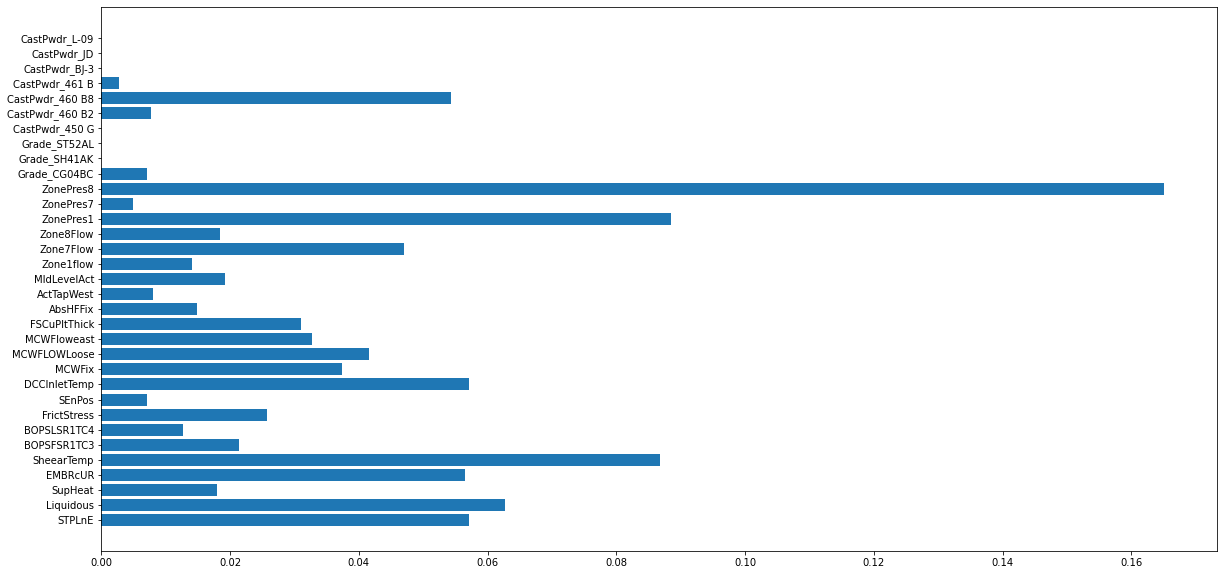

In [ ]:
plt1 = plt.figure(figsize= (20,10))
plt.barh(col_names, xgb.feature_importances_)
# plt.barh(col_names, xgb.feature_importances_)


In [ ]:
##Xg1 = Xg1_final[Xg1_final["Grade"] == 'CG04BC' ]

In [ ]:
##Xg1.drop("Grade", axis = 1, inplace = True)

In [ ]:
##Xg1

# **One hot encoding to obtain Xg11 from Xg1**

In [ ]:
Xg11 = pd.get_dummies(Xg1,drop_first=True)

In [ ]:
Xg11

,SegmdataNo,STPLnE,Liquidous,SupHeat,EMBRcUR,SheearTemp,BOPSFSR1TC3,BOPSLSR1TC4,FrictStress,SEnPos,...,ZonePres7,ZonePres8,TotalLc,Defect0_1,CastPwdr_460 B2,CastPwdr_460 B8,CastPwdr_461 B,CastPwdr_BJ-3,CastPwdr_JD,CastPwdr_L-09
91,1.0,78.0,1532.0,15.0,-197.0,987.0,199.9,174.2,17.183,6.0,...,10.77,1.76,0.206,0,0,0,0,1,0,0
92,2.0,156.0,1532.0,15.0,-196.0,987.0,199.2,173.7,17.567,6.0,...,10.85,1.93,0.285,0,0,0,0,1,0,0
93,3.0,234.0,1532.0,16.0,-196.0,987.0,197.8,172.9,18.208,6.0,...,10.88,1.72,0.096,0,0,0,0,1,0,0
94,4.0,312.0,1532.0,16.0,-197.0,987.0,199.9,173.2,17.695,6.0,...,10.85,1.72,0.000,0,0,0,0,1,0,0
95,5.0,390.0,1532.0,16.0,-197.0,987.0,204.0,176.8,17.567,6.0,...,10.79,1.74,0.111,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127427,8.0,384.0,1532.0,16.0,208.0,1024.0,190.7,186.6,19.616,58.0,...,12.00,2.08,0.728,0,0,0,0,1,0,0
127428,9.0,432.0,1532.0,17.0,207.0,1024.0,190.9,187.4,20.189,58.0,...,12.00,2.07,0.000,0,0,0,0,1,0,0
127429,10.0,480.0,1532.0,17.0,207.0,1024.0,189.7,188.1,19.616,58.0,...,12.00,2.06,0.986,0,0,0,0,1,0,0
127430,11.0,528.0,1532.0,18.0,208.0,1024.0,191.0,187.3,19.906,58.0,...,12.00,2.06,0.034,0,0,0,0,1,0,0


In [ ]:
Xg11.reset_index(inplace = True)

In [ ]:
Xg11.drop('index', axis = 1, inplace = True)

In [ ]:
Xg11 = Xg11[Xg11["TotalLc"] != 0.000]

In [ ]:
Xg11 = Xg11.reset_index(drop = True)

In [ ]:
yrf = Xg11["TotalLc"]

In [ ]:
#pd.set_option('display.max_columns', None)

In [ ]:
#Xg1.select_dtypes(include = ['object']).dtypes

In [ ]:
X_grade1 = Xg11.drop(["TotalLc","Defect0_1", "SegmdataNo"], axis =1)

In [ ]:
X_grade1

,STPLnE,Liquidous,SupHeat,EMBRcUR,SheearTemp,BOPSFSR1TC3,BOPSLSR1TC4,FrictStress,SEnPos,DCCInletTemp,...,Zone8Flow,ZonePres1,ZonePres7,ZonePres8,CastPwdr_460 B2,CastPwdr_460 B8,CastPwdr_461 B,CastPwdr_BJ-3,CastPwdr_JD,CastPwdr_L-09
0,78.0,1532.0,15.0,-197.0,987.0,199.9,174.2,17.183,6.0,29.3,...,470.0,6.31,10.77,1.76,0,0,0,1,0,0
1,156.0,1532.0,15.0,-196.0,987.0,199.2,173.7,17.567,6.0,29.3,...,491.0,6.28,10.85,1.93,0,0,0,1,0,0
2,234.0,1532.0,16.0,-196.0,987.0,197.8,172.9,18.208,6.0,29.3,...,464.0,6.27,10.88,1.72,0,0,0,1,0,0
3,390.0,1532.0,16.0,-197.0,987.0,204.0,176.8,17.567,6.0,29.3,...,469.0,6.20,10.79,1.74,0,0,0,1,0,0
4,468.0,1532.0,16.0,-197.0,987.0,207.8,174.6,17.439,6.0,29.3,...,467.0,6.23,10.78,1.73,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23351,192.0,1532.0,15.0,207.0,1024.0,193.3,189.0,20.128,58.0,33.1,...,374.0,2.90,12.00,2.05,0,0,0,1,0,0
23352,336.0,1532.0,16.0,207.0,1024.0,190.4,187.4,20.058,58.0,33.1,...,375.0,2.90,12.00,2.09,0,0,0,1,0,0
23353,384.0,1532.0,16.0,208.0,1024.0,190.7,186.6,19.616,58.0,33.1,...,375.0,2.90,12.00,2.08,0,0,0,1,0,0
23354,480.0,1532.0,17.0,207.0,1024.0,189.7,188.1,19.616,58.0,33.1,...,374.0,2.90,12.00,2.06,0,0,0,1,0,0


## **Regression RF**

In [ ]:
x_train = X_grade1.iloc[0:int(len(X_grade1)*0.75),:]
x_test = X_grade1.iloc[17517:,:]

In [ ]:

y_train = yrf[0:int(len(Xg11)*0.75)]
y_test = yrf[17517:]

In [ ]:
y_train

0        0.206
1        0.285
2        0.096
3        0.111
4        0.190
         ...  
17512    0.155
17513    0.073
17514    0.256
17515    0.335
17516    0.344
Name: TotalLc, Length: 17517, dtype: float64

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
def regression(model):
    model=model()
    r2=cross_val_score(model,x_train,y_train,scoring='r2',cv=5)
    mean_r2=np.mean(r2)
    print(mean_r2)

In [ ]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


NameError: ignored

In [ ]:
plt.barh(X_grade1.feature_names, rf.feature_importances_)

In [ ]:
importances = rf.feature_importances_

In [ ]:

sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_grade1.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_grade1.shape[1]), X_grade1.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_grade1.feature_names[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")


In [ ]:
#training data on RandomforestRegressor model
from sklearn.ensemble import RandomForestRegressor
regression(RandomForestRegressor)

In [ ]:
#training data on ExtraTreesRegressor model
from sklearn.ensemble import ExtraTreesRegressor
regression(ExtraTreesRegressor)

In [ ]:
#training data on XGBRegressor model
from xgboost import XGBRegressor
regression(XGBRegressor)

# **Weighted Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

In [ ]:
"""x_train = X_grade1.iloc[0:int(len(X_grade1)*0.75) + 5,:]
x_test = X_grade1.iloc[95993:,:]"""

'x_train = X_grade1.iloc[0:int(len(X_grade1)*0.75) + 5,:]\nx_test = X_grade1.iloc[95993:,:]'

In [ ]:
'''y_train = Xg11["Defect0_1"][0:int(len(Xg11)*0.75) + 5]
y_test = Xg11["Defect0_1"][95993:]'''

In [ ]:
x_train = X_grade1.iloc[0:int(len(X_grade1)*0.75) + 9,:]
x_test = X_grade1.iloc[36991:,:]

In [ ]:
y_train = Xg11["Defect0_1"][0:int(len(Xg11)*0.75) + 9]
y_test = Xg11["Defect0_1"][36991:]

In [ ]:
x_train

,SegmdataNo,STPLnE,Liquidous,SupHeat,EMBRcUR,SheearTemp,BOPSFSR1TC3,BOPSLSR1TC4,FrictStress,SEnPos,...,Zone8Flow,ZonePres1,ZonePres7,ZonePres8,CastPwdr_460 B2,CastPwdr_460 B8,CastPwdr_461 B,CastPwdr_BJ-3,CastPwdr_JD,CastPwdr_L-09
0,1.0,78.0,1532.0,15.0,-197.0,987.0,199.9,174.2,17.183,6.0,...,470.0,6.31,10.77,1.76,0,0,0,1,0,0
1,2.0,156.0,1532.0,15.0,-196.0,987.0,199.2,173.7,17.567,6.0,...,491.0,6.28,10.85,1.93,0,0,0,1,0,0
2,3.0,234.0,1532.0,16.0,-196.0,987.0,197.8,172.9,18.208,6.0,...,464.0,6.27,10.88,1.72,0,0,0,1,0,0
3,4.0,312.0,1532.0,16.0,-197.0,987.0,199.9,173.2,17.695,6.0,...,468.0,6.36,10.85,1.72,0,0,0,1,0,0
4,5.0,390.0,1532.0,16.0,-197.0,987.0,204.0,176.8,17.567,6.0,...,469.0,6.20,10.79,1.74,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36986,8.0,624.0,1532.0,23.0,263.0,1070.0,147.5,166.7,18.464,48.0,...,1072.0,5.15,12.00,12.00,0,1,0,0,0,0
36987,9.0,702.0,1532.0,23.0,263.0,1070.0,146.0,163.3,18.592,48.0,...,1067.0,5.16,12.00,12.00,0,1,0,0,0,0
36988,10.0,780.0,1532.0,23.0,263.0,1070.0,145.1,161.7,18.336,48.0,...,1057.0,5.11,12.00,11.99,0,1,0,0,0,0
36989,11.0,858.0,1532.0,23.0,263.0,1070.0,149.8,156.3,17.567,43.0,...,1021.0,5.15,12.00,11.07,0,1,0,0,0,0


In [ ]:
x_test

,SegmdataNo,STPLnE,Liquidous,SupHeat,EMBRcUR,SheearTemp,BOPSFSR1TC3,BOPSLSR1TC4,FrictStress,SEnPos,...,Zone8Flow,ZonePres1,ZonePres7,ZonePres8,CastPwdr_460 B2,CastPwdr_460 B8,CastPwdr_461 B,CastPwdr_BJ-3,CastPwdr_JD,CastPwdr_L-09
36991,1.0,78.0,1532.0,22.0,263.0,1085.0,155.7,157.9,16.799,40.0,...,450.0,5.13,12.0,1.91,0,1,0,0,0,0
36992,2.0,156.0,1532.0,22.0,263.0,1085.0,157.0,157.8,15.632,40.0,...,450.0,5.10,12.0,1.91,0,1,0,0,0,0
36993,3.0,234.0,1532.0,22.0,263.0,1085.0,154.6,158.4,16.543,40.0,...,450.0,5.13,12.0,1.90,0,1,0,0,0,0
36994,4.0,312.0,1532.0,22.0,263.0,1085.0,151.9,158.2,16.927,40.0,...,439.0,5.15,12.0,1.82,0,1,0,0,0,0
36995,5.0,390.0,1532.0,22.0,264.0,1085.0,151.7,159.1,17.579,40.0,...,458.0,5.14,12.0,1.97,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49305,8.0,384.0,1532.0,16.0,208.0,1024.0,190.7,186.6,19.616,58.0,...,375.0,2.90,12.0,2.08,0,0,0,1,0,0
49306,9.0,432.0,1532.0,17.0,207.0,1024.0,190.9,187.4,20.189,58.0,...,375.0,2.90,12.0,2.07,0,0,0,1,0,0
49307,10.0,480.0,1532.0,17.0,207.0,1024.0,189.7,188.1,19.616,58.0,...,374.0,2.90,12.0,2.06,0,0,0,1,0,0
49308,11.0,528.0,1532.0,18.0,208.0,1024.0,191.0,187.3,19.906,58.0,...,374.0,2.89,12.0,2.06,0,0,0,1,0,0


In [ ]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
36986    0
36987    0
36988    0
36989    0
36990    0
Name: Defect0_1, Length: 36991, dtype: int64

In [ ]:
y_train.value_counts()

0    36950
1       41
Name: Defect0_1, dtype: int64

Defect = 0.11% in training data

In [ ]:
y_test

36991    0.274
36992    0.384
36993    0.000
36994    0.000
36995    0.104
         ...  
49305    0.728
49306    0.000
49307    0.986
49308    0.034
49309    0.000
Name: TotalLc, Length: 12319, dtype: float64

In [ ]:
y_test.value_counts()

0.000    5363
0.113      77
0.089      56
0.079      48
0.091      46
         ... 
0.790       1
0.624       1
0.566       1
0.621       1
0.728       1
Name: TotalLc, Length: 1406, dtype: int64

Defect = 0.498% in test data

# Normal Logistic Regression with no weights

In [ ]:
# define class weights
#w = {0:1, 1:99}
# define model
lg2 = LogisticRegression(random_state=13, class_weight= None)
# fit it
lg2.fit(x_train,y_train)
# test
y_pred = lg2.predict(x_test) 
y_pred_probab = lg2.predict_proba(x_test)
y_pred_probab = y_pred_probab[:, 1]
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

NameError: ignored

In [ ]:
y_pred_probab

NameError: ignored

In [ ]:
yhat = lg2.predict(x_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_probab)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
Xg11.to_csv('Xg11.csv', index = False)

#Weighted LR

In [ ]:
from sklearn.utils import class_weight

In [ ]:
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
#model.fit(X_train, y_train, class_weight=class_weights)

TypeError: ignored

In [ ]:
# define class weights
w = {0:1, 1:1000}
# define model
lg2 = LogisticRegression(random_state=40, class_weight= w)
# fit it
lg2.fit(x_train,y_train)
# test
y_pred = lg2.predict(x_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

ValueError: ignored

In [ ]:
# define class weights
#w = {0:1, 1:1000}
# define model
lg2 = LogisticRegression(random_state=40, class_weight= 'balanced')
# fit it
lg2.fit(X_res,y_res)
# test
y_pred = lg2.predict(X_restest)
# performance
print(f'Accuracy Score: {accuracy_score(y_restest,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_restest, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_restest, y_pred)}')
print(f'Recall score: {recall_score(y_restest,y_pred)}')

Accuracy Score: 0.5
Confusion Matrix: 
[[31875     0]
 [31875     0]]
Area Under Curve: 0.5
Recall score: 0.0


In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/MTech_Project/Grade_2_excel.xlsx')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Logistic: f1=0.841 auc=0.898


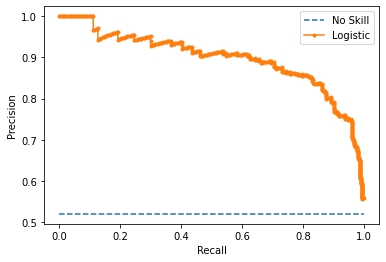

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
trainy.sum()


239

In [ ]:
trainy.shape

(500,)

## **Random Forest with splitting**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 500, random_state = 42)

In [ ]:
rf.fit(x_train,y_train)
y_pred3=rf.predict(x_test)

In [ ]:
from sklearn import metrics

In [ ]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred3))

ACCURACY OF THE MODEL:  0.9950482993749493


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_pred3)

array([[12258,     0],
       [   61,     0]])

## **Random Forest with splitting for regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
rf.fit(x_train,y_train)
y_pred3=rf.predict(x_test)
R_square=r2_score(y_test,y_pred3)
print(R_square)

-0.012405070910011862


**Random Forest without splitting**

In [ ]:
rf1 = RandomForestClassifier(n_estimators = 500, random_state = 42)
rfm = rf1.fit(X_grade1, yrf)

In [ ]:
importances = rf1.feature_importances_

In [ ]:
sorted_indices = np.argsort(importances)[::-1]

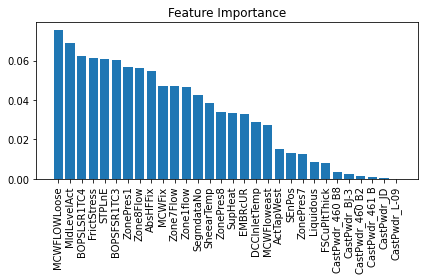

In [ ]:
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_grade1.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_grade1.shape[1]), X_grade1.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
sorted_indices = np.argsort(importances)[::-1]

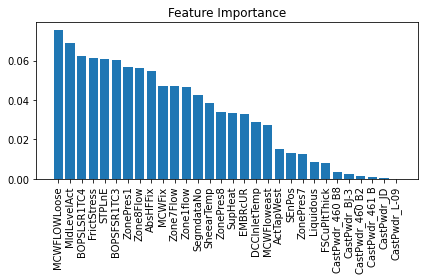

In [ ]:
plt.title('Feature Importance')
plt.bar(range(X_grade1.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_grade1.shape[1]), X_grade1.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

## **ANN**

In [ ]:
x_train_22.shape[1:]

(33,)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation

In [ ]:
model = Sequential()
model.add(Dense(128, input_shape=(33,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1,))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history = model.fit(df_22, y_train_22, epochs = 100, validation_split = 0.2,shuffle = True, verbose = 0)

In [ ]:
# Runs model with its current weights on the training and testing data
y_train_pred = model.predict(df_22)
y_test_pred = model.predict(df_test_22)

# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train_22, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test_22, y_test_pred)))

The R2 score on the Train set is:	0.095
The R2 score on the Test set is:	-0.013


### **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
unique, count = np.unique(y_train, return_counts=True)
y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_dict_value_count

{0: 36950, 1: 41}

In [ ]:
sm = SMOTE(random_state=12, sampling_strategy = 0.75)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [ ]:
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 36950, 1: 27712}

In [ ]:
clf = LogisticRegression().fit(x_train_res, y_train_res)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
Y_Test_Pred = clf.predict(x_test)

In [ ]:
y_test


36991    0
36992    0
36993    0
36994    0
36995    0
        ..
49305    0
49306    0
49307    0
49308    0
49309    0
Name: Defect0_1, Length: 12319, dtype: int64

In [ ]:
pd.crosstab(Y_Test_Pred, y_test, rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,9305,47
1,2953,14


In [ ]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [ ]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [ ]:
generate_model_report(y_test, Y_Test_Pred)

Accuracy =  0.7564737397516033
Precision =  0.0047185709470845974
Recall =  0.22950819672131148
F1 Score =  0.009247027741083222


In [ ]:

pipe = make_pipeline(
    ('smote', SMOTE()),
                ('logisticregression', LogisticRegression())
)

weights = np.linspace(0.005, 0.25, 10)


gsc = GridSearchCV(
    estimator=pipe,
    param_grid={
        'sampling_strategy': weights
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(x_train, y_train)

print("Best parameters : %s" % grid_result.best_params_)
weight_f1_score_df = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                                   'weight': weights })
weight_f1_score_df.plot(x='weight')


TypeError: ignored

In [ ]:
from imblearn.pipeline import Pipeline
pipe = Pipeline([
        ('sampling', SMOTE()),
        ('classification', LogisticRegression())
    ])


In [ ]:
weights = np.linspace(0.005, 0.25, 10)


gsc = GridSearchCV(
    estimator=pipe,
    param_grid={
        'sampling_strategy': weights
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(x_train, y_train)

print("Best parameters : %s" % grid_result.best_params_)
weight_f1_score_df = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                                   'weight': weights })
weight_f1_score_df.plot(x='weight')


ValueError: ignored

In [ ]:
rf.fit(x_train_res,y_train_res)
y_predsm=rf.predict(x_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_predsm))

ACCURACY OF THE MODEL:  0.9950482993749493


In [ ]:
confusion_matrix(y_test, y_predsm)

array([[12258,     0],
       [   61,     0]])

In [ ]:
pd.crosstab(y_predsm, y_test, rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,12258,61


In [ ]:
unique, count = np.unique(y_train, return_counts=True)
y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_dict_value_count

{0: 36950, 1: 41}

In [ ]:
sm = SMOTE(random_state=12, sampling_strategy = 0.75)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [ ]:
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 36950, 1: 27712}

In [ ]:
x_train2 = x_train_res.iloc[0:int(len(x_train_res)*0.75) + 9,:]
x_test2 = x_train_res.iloc[48505:,:]

In [ ]:
x_train2

,SegmdataNo,STPLnE,Liquidous,SupHeat,EMBRcUR,SheearTemp,BOPSFSR1TC3,BOPSLSR1TC4,FrictStress,SEnPos,...,Zone8Flow,ZonePres1,ZonePres7,ZonePres8,CastPwdr_460 B2,CastPwdr_460 B8,CastPwdr_461 B,CastPwdr_BJ-3,CastPwdr_JD,CastPwdr_L-09
0,1.000000,78.000000,1532.000000,15.000000,-197.000000,987.000000,199.900000,174.200000,17.183000,6.000000,...,470.000000,6.310000,10.770000,1.760000,0,0,0,1,0,0
1,2.000000,156.000000,1532.000000,15.000000,-196.000000,987.000000,199.200000,173.700000,17.567000,6.000000,...,491.000000,6.280000,10.850000,1.930000,0,0,0,1,0,0
2,3.000000,234.000000,1532.000000,16.000000,-196.000000,987.000000,197.800000,172.900000,18.208000,6.000000,...,464.000000,6.270000,10.880000,1.720000,0,0,0,1,0,0
3,4.000000,312.000000,1532.000000,16.000000,-197.000000,987.000000,199.900000,173.200000,17.695000,6.000000,...,468.000000,6.360000,10.850000,1.720000,0,0,0,1,0,0
4,5.000000,390.000000,1532.000000,16.000000,-197.000000,987.000000,204.000000,176.800000,17.567000,6.000000,...,469.000000,6.200000,10.790000,1.740000,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48500,1.075797,82.958647,1532.000000,12.924203,-254.000000,1050.909560,184.379241,205.231267,16.230656,46.635661,...,469.105084,6.688923,12.000000,1.846968,0,0,0,0,0,0
48501,6.000000,474.422157,1532.000000,16.297322,-252.594644,1011.843397,150.475899,167.613573,17.478511,109.859281,...,445.118929,5.588393,12.000000,1.840704,0,0,0,0,0,0
48502,1.000000,42.317155,1531.017620,25.876662,0.000000,917.334774,200.870046,188.327759,13.488702,88.035239,...,475.564157,5.131676,11.873314,3.067537,0,0,0,0,0,0
48503,1.561183,115.240559,1532.000000,16.518986,274.088619,1130.084394,151.830378,157.655696,15.792674,54.312226,...,891.350198,6.919114,12.000000,12.000000,0,0,0,1,0,0


In [ ]:
y_train2 = y_train_res[0:int(len(y_train_res)*0.75) + 9]
y_test2 = y_train_res[48505:]

In [ ]:
y_train2

0        0
1        0
2        0
3        0
4        0
        ..
48500    1
48501    1
48502    1
48503    1
48504    1
Name: Defect0_1, Length: 48505, dtype: int64

In [ ]:
y_test2

48505    1
48506    1
48507    1
48508    1
48509    1
        ..
64657    1
64658    1
64659    1
64660    1
64661    1
Name: Defect0_1, Length: 16157, dtype: int64

In [ ]:
clf = LogisticRegression().fit(x_train2, y_train2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
Y_Test_Pred = clf.predict(x_test2)

In [ ]:
y_test2


48505    1
48506    1
48507    1
48508    1
48509    1
        ..
64657    1
64658    1
64659    1
64660    1
64661    1
Name: Defect0_1, Length: 16157, dtype: int64

In [ ]:
pd.crosstab(Y_Test_Pred, y_test2, rownames=['Predicted'], colnames=['Actual'])

Actual,1
Predicted,
0,11721
1,4436


### **Xgboost**

In [ ]:

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap
from xgboost import XGBRegressor

In [ ]:
import pandas as pd
from sklearn import preprocessing
#returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_grade1)
df = pd.DataFrame(x_scaled)

In [ ]:
xgb = XGBRegressor(n_estimators=200)
xgb.fit(df, yrf)

[07:14:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=200)

In [ ]:
y = xgb.predict(df)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [ ]:
r2_score(yrf,y)

0.5746693524596549

In [ ]:
xgb.feature_importances_


array([0.01795413, 0.06320353, 0.04818963, 0.00528768, 0.02014993,
       0.06699701, 0.20317131, 0.04029765, 0.00843277, 0.01701328,
       0.01908636, 0.02903084, 0.0072503 , 0.01326803, 0.11132244,
       0.00646203, 0.03441152, 0.0218524 , 0.05445991, 0.05458482,
       0.04366285, 0.0129315 , 0.07076918, 0.        , 0.03021099,
       0.        , 0.        , 0.        , 0.        ], dtype=float32)

In [ ]:
xgb.feature_importances_.shape

(29,)

In [ ]:
list(df.columns)

In [ ]:
col_names = list(X_grade1.columns)
col_names

['STPLnE',
 'Liquidous',
 'SupHeat',
 'EMBRcUR',
 'SheearTemp',
 'BOPSFSR1TC3',
 'BOPSLSR1TC4',
 'FrictStress',
 'SEnPos',
 'DCCInletTemp',
 'MCWFix',
 'MCWFLOWLoose',
 'MCWFloweast',
 'FSCuPltThick',
 'AbsHFFix',
 'ActTapWest',
 'MldLevelAct',
 'Zone1flow',
 'Zone7Flow',
 'Zone8Flow',
 'ZonePres1',
 'ZonePres7',
 'ZonePres8',
 'CastPwdr_460 B2',
 'CastPwdr_460 B8',
 'CastPwdr_461 B',
 'CastPwdr_BJ-3',
 'CastPwdr_JD',
 'CastPwdr_L-09']

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.032110,0.666667,0.944954,0.197269,0.312950,0.746771,0.589944,0.554147,0.005076,0.337209,...,0.299656,0.618102,0.768178,0.143096,0.0,0.0,0.0,1.0,0.0,0.0
1,0.091743,0.666667,0.944954,0.198786,0.312950,0.743542,0.587776,0.566531,0.005076,0.337209,...,0.323766,0.614790,0.775021,0.157322,0.0,0.0,0.0,1.0,0.0,0.0
2,0.151376,0.666667,0.948012,0.198786,0.312950,0.737085,0.584309,0.587203,0.005076,0.337209,...,0.292767,0.613687,0.777588,0.139749,0.0,0.0,0.0,1.0,0.0,0.0
3,0.270642,0.666667,0.948012,0.197269,0.312950,0.765683,0.601214,0.566531,0.005076,0.337209,...,0.298507,0.605960,0.769889,0.141423,0.0,0.0,0.0,1.0,0.0,0.0
4,0.330275,0.666667,0.948012,0.197269,0.312950,0.783210,0.591678,0.562403,0.005076,0.337209,...,0.296211,0.609272,0.769033,0.140586,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23351,0.119266,0.666667,0.944954,0.810319,0.446043,0.716328,0.654096,0.649123,0.137056,0.779070,...,0.189437,0.241722,0.873396,0.167364,0.0,0.0,0.0,1.0,0.0,0.0
23352,0.229358,0.666667,0.948012,0.810319,0.446043,0.702952,0.647161,0.646865,0.137056,0.779070,...,0.190586,0.241722,0.873396,0.170711,0.0,0.0,0.0,1.0,0.0,0.0
23353,0.266055,0.666667,0.948012,0.811836,0.446043,0.704336,0.643693,0.632611,0.137056,0.779070,...,0.190586,0.241722,0.873396,0.169874,0.0,0.0,0.0,1.0,0.0,0.0
23354,0.339450,0.666667,0.951070,0.810319,0.446043,0.699723,0.650195,0.632611,0.137056,0.779070,...,0.189437,0.241722,0.873396,0.168201,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
perm_importance = permutation_importance(xgb, df, y)

<BarContainer object of 29 artists>

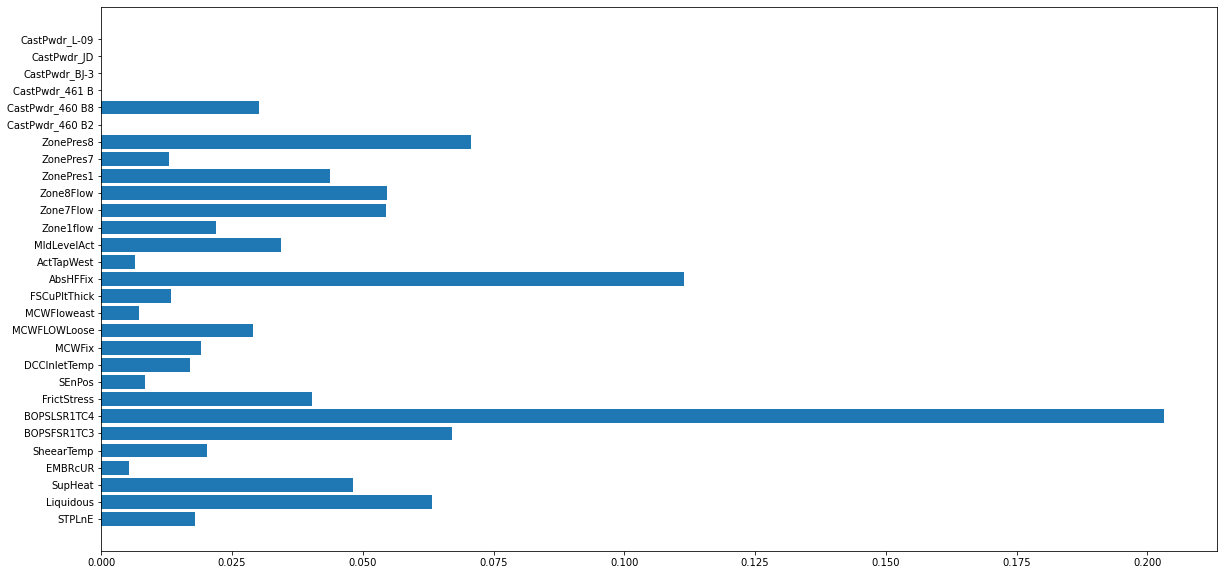

In [ ]:
plt1 = plt.figure(figsize= (20,10))
plt.barh(col_names, xgb.feature_importances_)
# plt.barh(col_names, xgb.feature_importances_)


In [ ]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(df.feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance

'sorted_idx = perm_importance.importances_mean.argsort()\nplt.barh(df.feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])\nplt.xlabel("Permutation Importance")'

### **Xgboost2**

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap
from xgboost import XGBRegressor

In [ ]:
import pandas as pd
from sklearn import preprocessing
 #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_train)
df = pd.DataFrame(x_scaled)

'import pandas as pd\nfrom sklearn import preprocessing\n #returns a numpy array\nmin_max_scaler = preprocessing.MinMaxScaler()\nx_scaled = min_max_scaler.fit_transform(x_train)\ndf = pd.DataFrame(x_scaled)'

In [ ]:
xgb = XGBRegressor(n_estimators=200)
xgb.fit(df, y_train)

[09:17:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=200)

In [ ]:
y = xgb.predict(df)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_train,y)

0.43420134444684

In [ ]:
xgb.feature_importances_


array([0.04878907, 0.        , 0.02266218, 0.04475863, 0.02235899,
       0.01015979, 0.02321273, 0.0650541 , 0.00563776, 0.04510213,
       0.0354916 , 0.02927085, 0.04264517, 0.0115572 , 0.06190635,
       0.01649495, 0.01642813, 0.04697354, 0.0232085 , 0.01229975,
       0.03057817, 0.01555814, 0.03261583, 0.        , 0.23021099,
       0.07237956, 0.0207848 , 0.01251352, 0.00134765], dtype=float32)

In [ ]:
xgb.feature_importances_.shape

(29,)

In [ ]:
list(df.columns)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

In [ ]:
col_names = list(X_grade1.columns)
col_names

['STPLnE',
 'Liquidous',
 'SupHeat',
 'EMBRcUR',
 'SheearTemp',
 'BOPSFSR1TC3',
 'BOPSLSR1TC4',
 'FrictStress',
 'SEnPos',
 'DCCInletTemp',
 'MCWFix',
 'MCWFLOWLoose',
 'MCWFloweast',
 'FSCuPltThick',
 'AbsHFFix',
 'ActTapWest',
 'MldLevelAct',
 'Zone1flow',
 'Zone7Flow',
 'Zone8Flow',
 'ZonePres1',
 'ZonePres7',
 'ZonePres8',
 'CastPwdr_460 B2',
 'CastPwdr_460 B8',
 'CastPwdr_461 B',
 'CastPwdr_BJ-3',
 'CastPwdr_JD',
 'CastPwdr_L-09']

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.032110,0.666667,0.950769,0.199081,0.312950,0.748497,0.589944,0.575529,0.005076,0.337209,...,0.299656,0.618102,0.768178,0.143096,0.0,0.0,0.0,1.0,0.0,0.0
1,0.091743,0.666667,0.950769,0.200613,0.312950,0.745261,0.587776,0.588391,0.005076,0.337209,...,0.323766,0.614790,0.775021,0.157322,0.0,0.0,0.0,1.0,0.0,0.0
2,0.151376,0.666667,0.953846,0.200613,0.312950,0.738789,0.584309,0.609861,0.005076,0.337209,...,0.292767,0.613687,0.777588,0.139749,0.0,0.0,0.0,1.0,0.0,0.0
3,0.270642,0.666667,0.953846,0.199081,0.312950,0.767453,0.601214,0.588391,0.005076,0.337209,...,0.298507,0.605960,0.769889,0.141423,0.0,0.0,0.0,1.0,0.0,0.0
4,0.330275,0.666667,0.953846,0.199081,0.312950,0.785021,0.591678,0.584104,0.005076,0.337209,...,0.296211,0.609272,0.769033,0.140586,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17512,0.192661,0.666667,0.972308,0.173047,0.579137,0.711974,0.659298,0.487138,0.045685,0.651163,...,0.902411,0.571744,0.873396,1.000000,0.0,0.0,0.0,1.0,0.0,0.0
17513,0.339450,0.666667,0.969231,0.169985,0.579137,0.717522,0.665366,0.500971,0.045685,0.651163,...,0.903559,0.566225,0.873396,1.000000,0.0,0.0,0.0,1.0,0.0,0.0
17514,0.412844,0.666667,0.969231,0.168453,0.579137,0.725844,0.668834,0.482650,0.045685,0.651163,...,0.903559,0.571744,0.873396,1.000000,0.0,0.0,0.0,1.0,0.0,0.0
17515,0.486239,0.666667,0.966154,0.168453,0.579137,0.720296,0.666667,0.482851,0.045685,0.651163,...,0.902411,0.565121,0.873396,1.000000,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
perm_importance = permutation_importance(xgb, df, y)

<BarContainer object of 29 artists>

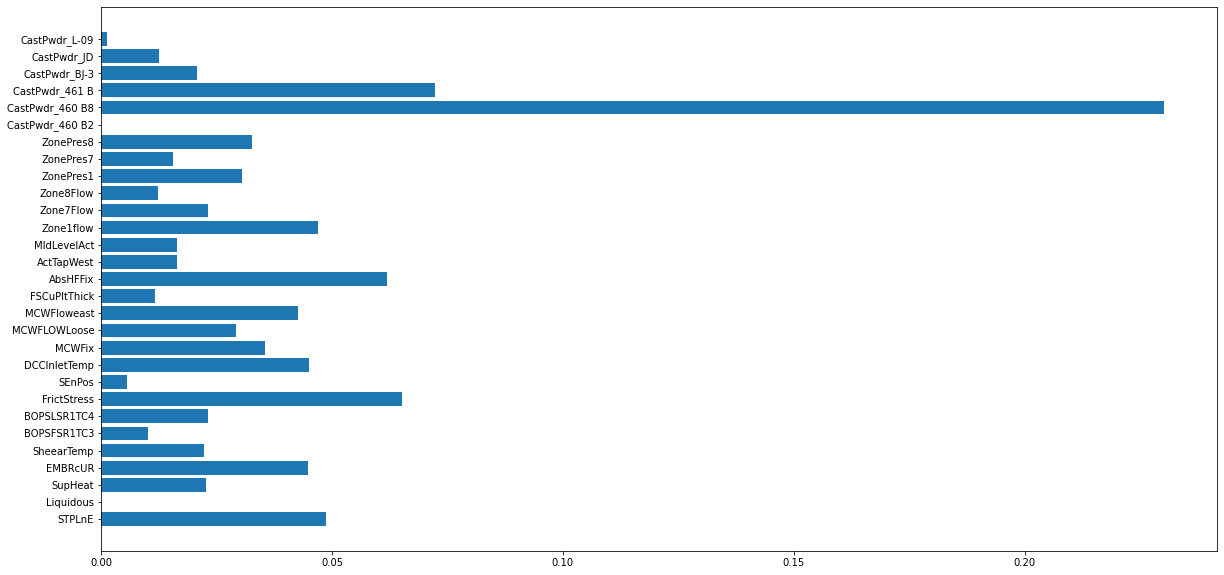

In [ ]:
plt1 = plt.figure(figsize= (20,10))
plt.barh(col_names, xgb.feature_importances_)
# plt.barh(col_names, xgb.feature_importances_)


In [ ]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(df.feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

'sorted_idx = perm_importance.importances_mean.argsort()\nplt.barh(df.feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])\nplt.xlabel("Permutation Importance")'